# Data Quality Report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
#below to allow for all columns in csv to display
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## read data into data frame, ignoring whitespace

In [2]:
df = pd.read_csv('CustomerChurn-12751005.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

## dispaying how many row and columns in the data i.e. 1000 rows, 33 columns

In [3]:
print("Number of rows is:",df.shape[0],"Number of columns is:", df.shape[1])

Number of rows is: 1000 Number of columns is: 33


## Print the first and the last 5 rows.

In [4]:
df.head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1093646,28,NaN,NaN,no,False,6,2,220,True,29.99,E,False,true,76.09,1290.75,59.99,54.50,2.6,4.685,-0.4388,240.34,51.33,11.67,0.901895,16.012870,5.00,10,21.67,0,0,0,True
1,1033207,52,professional,town,no,False,1,1,730,True,0.00,C,True,false,35.59,208.25,30.25,11.25,0.0,0.615,1.0352,91.06,3.33,9.33,1.529568,20.921980,1.33,25,0.00,0,0,0,True
2,1037740,24,NaN,NaN,unknown,False,0,1,574,True,0.00,E,True,false,79.95,522.00,84.98,0.00,0.0,5.340,0.1998,103.01,32.67,12.33,0.928293,-11.860777,1.00,19,1.67,0,0,0,False
3,1068745,44,NaN,suburban,yes,True,9,1,329,True,0.00,B,False,true,52.49,449.25,39.99,90.75,0.0,-4.265,-0.4500,0.00,0.00,0.00,0.000000,21.730942,0.00,11,0.00,0,0,0,True
4,1075412,50,NaN,suburban,unknown,False,7,1,336,True,0.00,B,True,false,34.99,191.75,44.99,0.00,0.0,0.045,0.0000,44.57,7.67,6.67,1.608413,10.314695,15.00,12,0.00,0,0,0,False


In [5]:
df.tail(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
995,1081523,58,professional,NaN,yes,True,7,1,313,True,0.00,B,False,true,97.65,615.75,41.36,213.50,0.0,-9.295,-1.4602,264.74,11.00,1.67,1.134881,-11.408605,18.33,11,0.00,0,0,0,True
996,1024091,54,NaN,town,no,False,8,2,725,True,29.99,E,False,true,89.78,605.50,49.99,128.50,0.0,-4.330,-0.7760,185.74,39.00,21.67,4.160516,-3.779749,6.00,25,0.00,0,0,0,True
997,1059457,0,NaN,NaN,unknown,False,0,2,121,True,59.99,C,True,false,83.38,1133.50,50.00,131.25,0.0,6.030,1.5074,258.16,44.00,7.00,0.696471,-16.617508,63.00,13,15.00,0,0,0,True
998,1094149,0,NaN,suburban,unknown,False,0,4,143,True,129.99,E,True,false,50.49,1163.75,45.75,0.00,0.0,-7.215,-0.9900,385.43,154.67,52.67,1.755025,-6.607509,11.33,9,1.33,0,0,0,True
999,1043561,0,NaN,NaN,no,False,5,2,187,True,29.99,E,True,true,56.71,661.75,52.37,42.75,0.0,-4.375,-0.4344,107.07,32.67,2.33,0.669868,0.737549,10.33,17,0.00,0,0,0,True


## Convert the features to their appropriate data types

In [6]:
#displaying types
df.dtypes

customer                        int64
age                             int64
occupation                     object
regionType                     object
marriageStatus                 object
children                         bool
income                          int64
numHandsets                     int64
handsetAge                      int64
smartPhone                       bool
currentHandsetPrice           float64
creditRating                   object
homeOwner                        bool
creditCard                     object
avgBill                       float64
avgMins                       float64
avgrecurringCharge            float64
avgOverBundleMins             float64
avgRoamCalls                  float64
callMinutesChangePct          float64
billAmountChangePct           float64
avgReceivedMins               float64
avgOutCalls                   float64
avgInCalls                    float64
peakOffPeakRatio              float64
peakOffPeakRatioChangePct     float64
avgDroppedCa

After analysing all of the object and bool columns, I decided to convert them to categorical

In [7]:
"""
Taken from Lab4
"""
# Select columns containing categorical data
categorical_columns = df[['occupation','regionType','marriageStatus','children','creditRating',
                          'homeOwner','creditCard','churn','smartPhone']].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

## Select continuous columns

In [8]:
continuous_columns = df.select_dtypes(include=['int64','float64']).columns

## Check for constant columns and remove if any found

In [9]:
constant_cols=False
for column in categorical_columns:
    if df[column].nunique()==1:
        df = df.drop(column,1)
        constant_cols=True
        
for column in continuous_columns:
    if df[column].nunique()==1:
        df = df.drop(column,1)
        constant_cols=True
        
if constant_cols:
    print("contant columns have been removed")
else:
    print("no constant columns found")

no constant columns found


## No duplicate columns, so save cleaned df to csv

In [10]:
df_cleaned = df

In [11]:
df_cleaned.to_csv('CustomerChurnCleaned12751005.csv', index=False)

## Save table with descriptive statistics for all the continuous features in CSV file

In [12]:
"""
Taken from Lab4
"""
## Save table with descriptive statistics for all the continuous features in CSV file
df[continuous_columns].describe().T.to_csv('continuous_descriptive_stats.csv')

#Print table
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
customer,1000.0,1.051046e+06,28686.806727,1.000004e+06,1.025288e+06,1.052374e+06,1.074990e+06,1.099882e+06
age,1000.0,2.950000e+01,22.347112,0.000000e+00,0.000000e+00,3.400000e+01,4.600000e+01,9.000000e+01
income,1000.0,4.249000e+00,3.124862,0.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,9.000000e+00
numHandsets,1000.0,1.759000e+00,1.298694,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.100000e+01
handsetAge,1000.0,3.898020e+02,261.911226,-1.000000e+00,2.137500e+02,3.380000e+02,5.060000e+02,1.812000e+03
currentHandsetPrice,1000.0,3.576583e+01,58.494544,0.000000e+00,0.000000e+00,0.000000e+00,3.999000e+01,4.999900e+02
avgBill,1000.0,5.872940e+01,44.508932,0.000000e+00,3.312250e+01,4.925000e+01,7.186250e+01,5.039100e+02
avgMins,1000.0,5.178685e+02,532.238351,0.000000e+00,1.486250e+02,3.616250e+02,7.177500e+02,6.103750e+03
avgrecurringCharge,1000.0,4.645945e+01,23.186612,0.000000e+00,3.000000e+01,4.499000e+01,5.999000e+01,2.001500e+02
avgOverBundleMins,1000.0,4.198217e+01,109.915453,0.000000e+00,0.000000e+00,3.500000e+00,4.518750e+01,1.912500e+03


## Save a table with descriptive statistics for all the categorical features in a CSV file

In [13]:
"""
Taken from Lab4
"""
# Save table with descriptive statistics for all the categorical features in CSV file
df.select_dtypes(['category']).describe().T.to_csv('categorical_descriptive_stats.csv')

# Print table
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
occupation,255,7,professional,156
regionType,508,5,suburban,298
marriageStatus,1000,3,unknown,396
children,1000,2,False,763
smartPhone,1000,2,True,898
creditRating,1000,7,B,385
homeOwner,1000,2,False,632
creditCard,1000,6,true,647
churn,1000,2,False,501


## Create histograms for continuous features

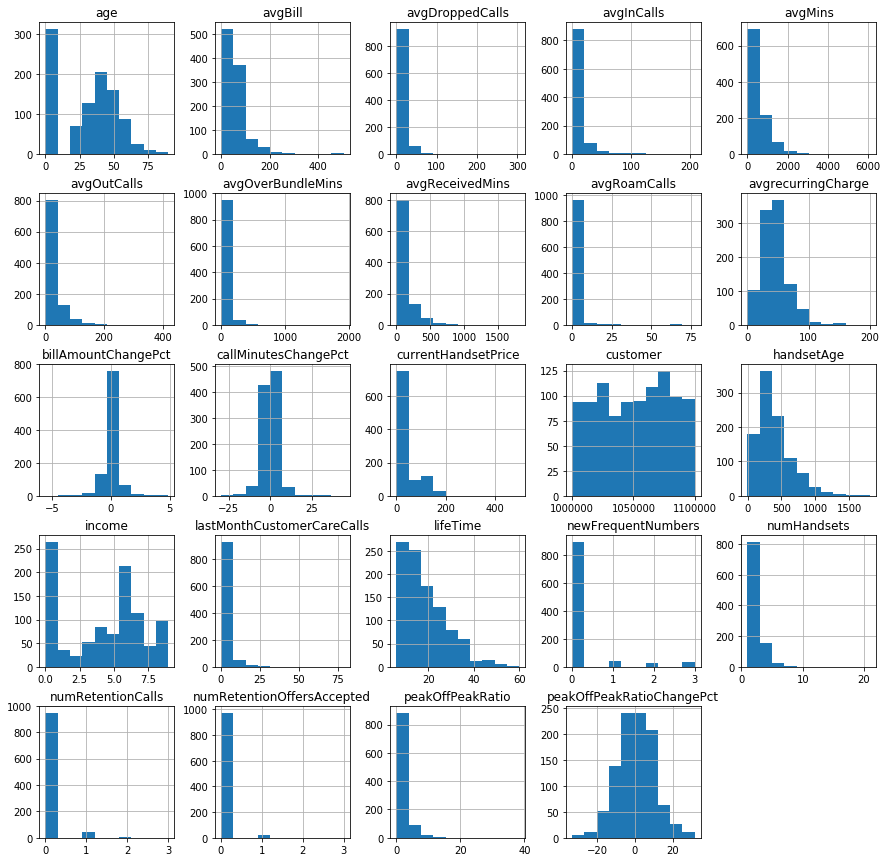

In [14]:
"""
Taken from Lab4
"""
# Plot a histogram of the continuous features and save in a PDF file
df_cleaned[continuous_columns].hist(figsize=(15,15))
plt.savefig('continuous_histograms.pdf')

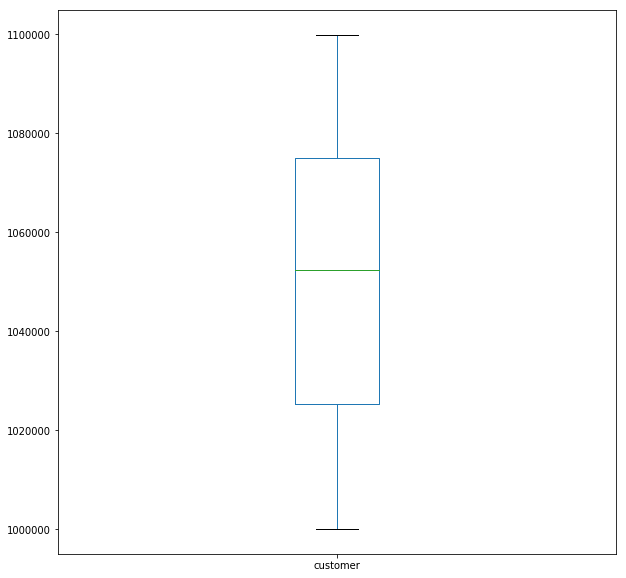

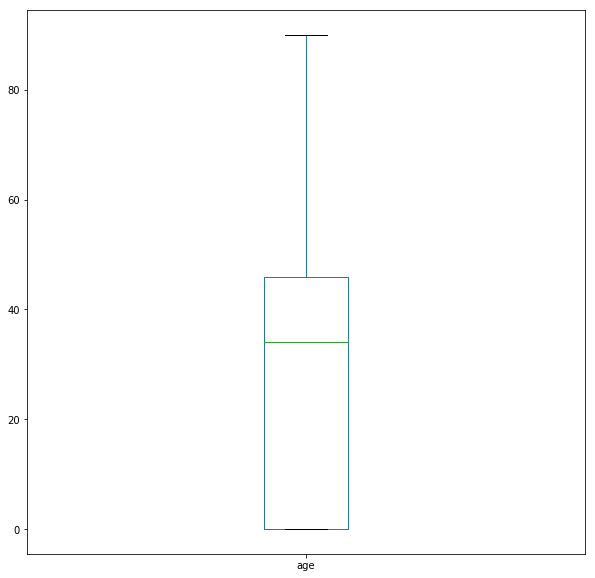

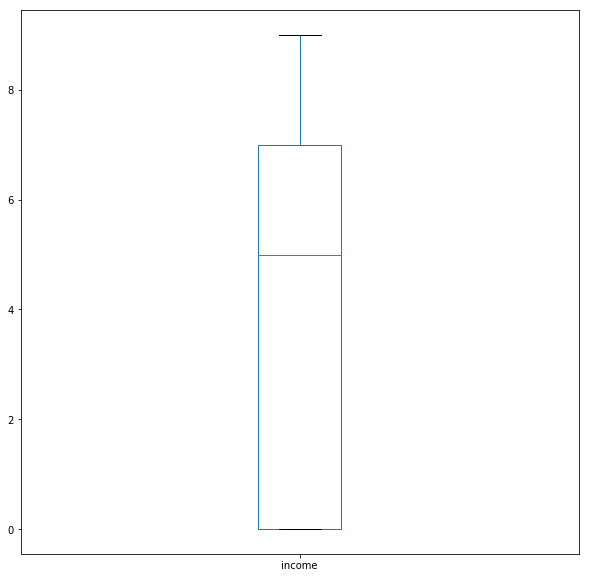

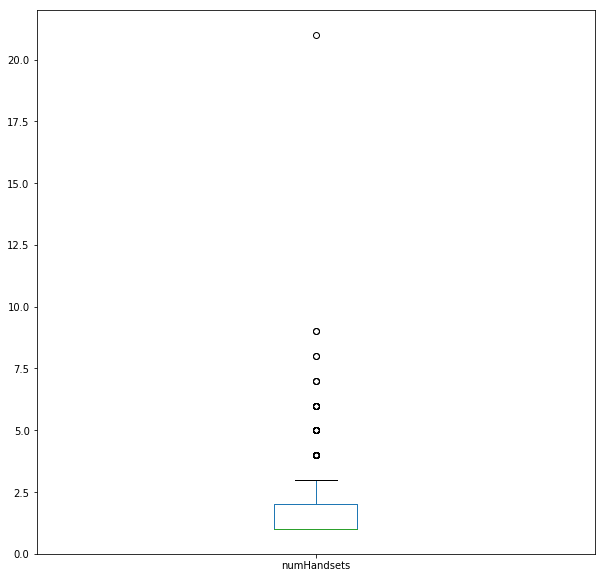

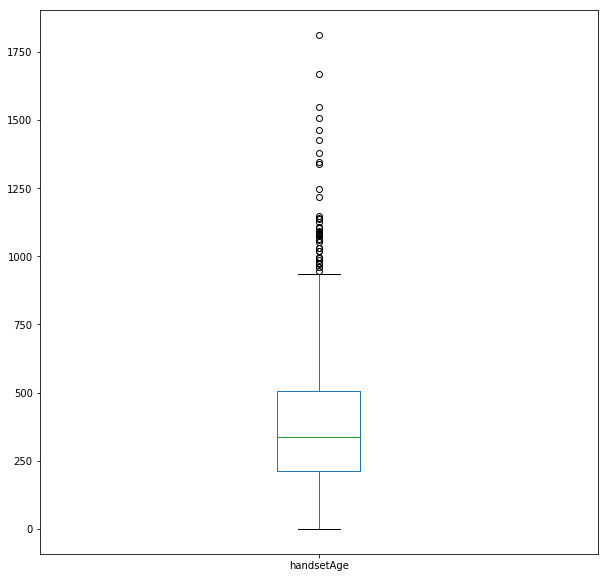

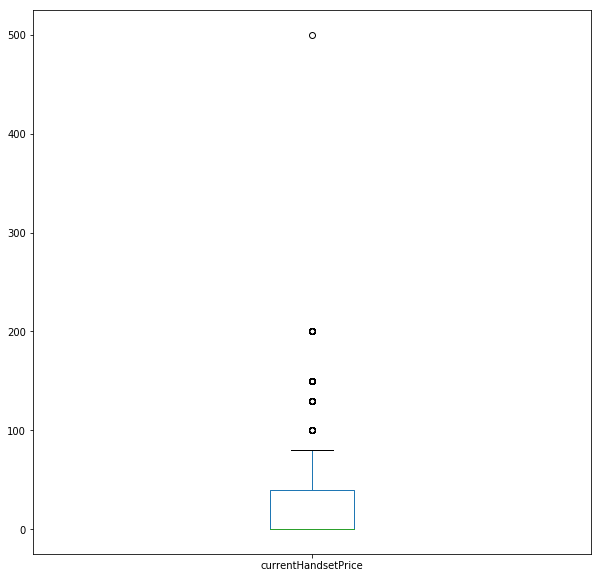

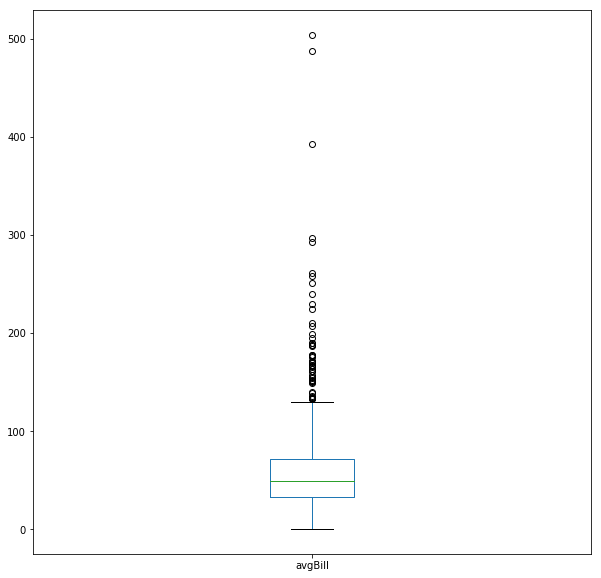

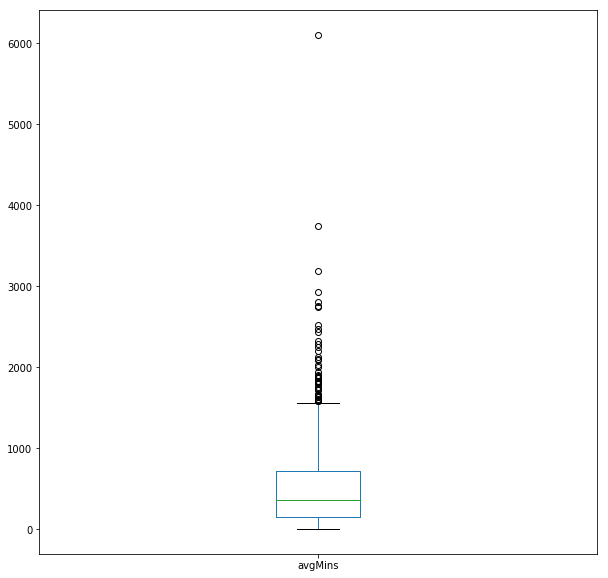

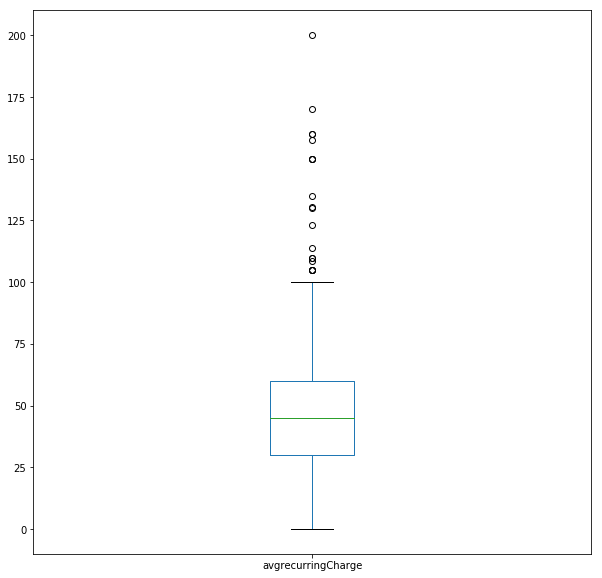

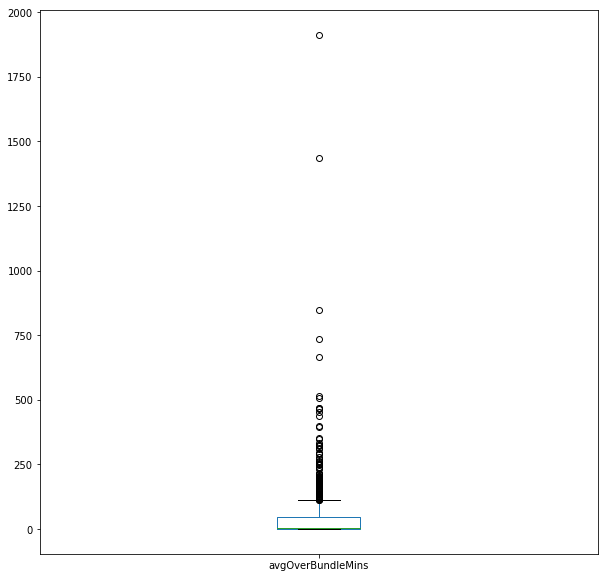

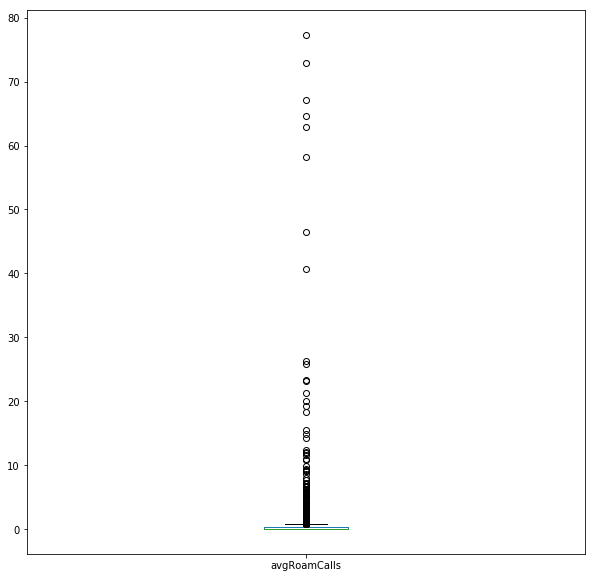

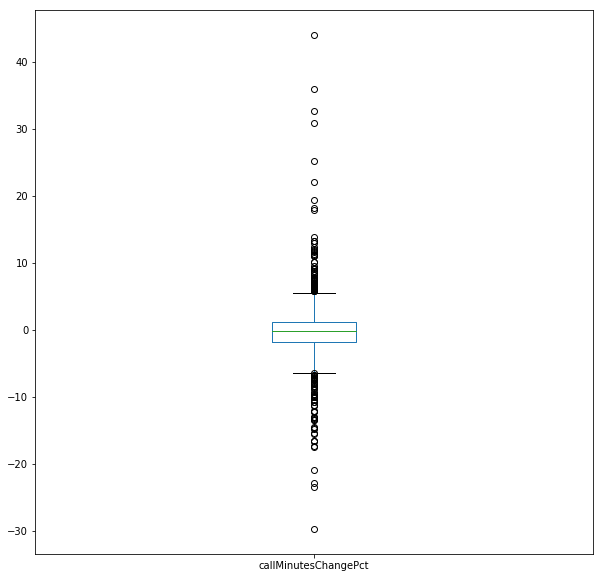

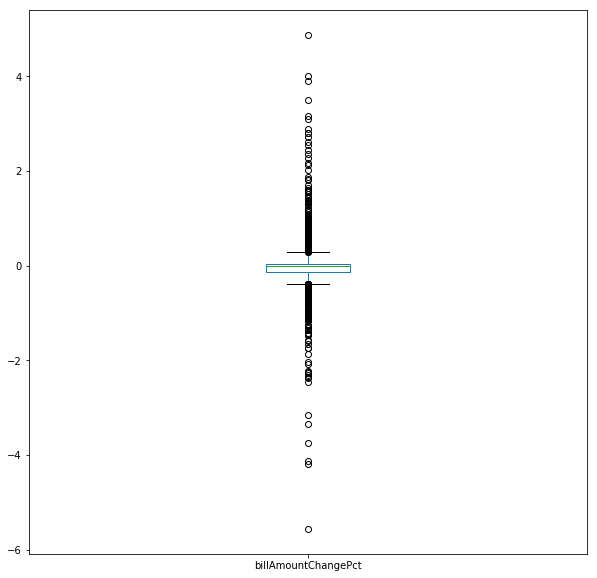

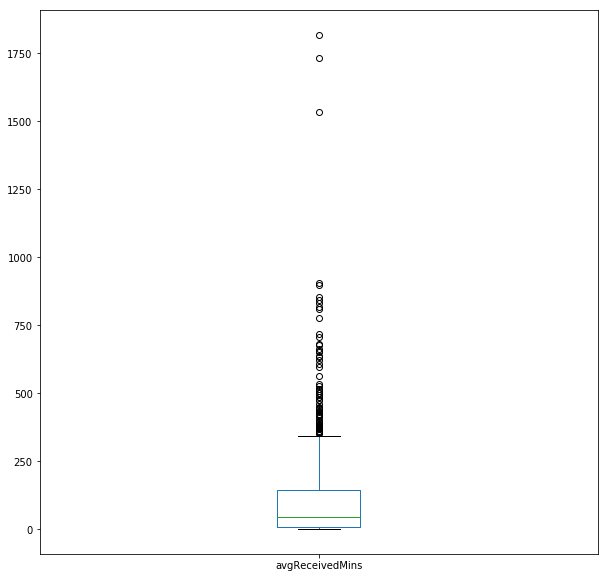

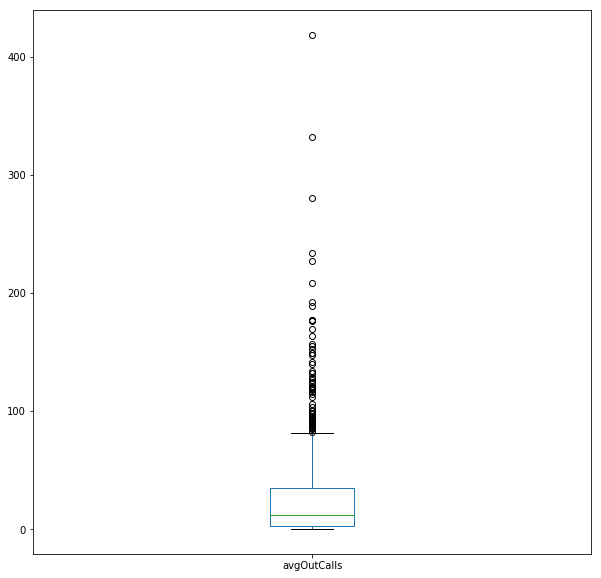

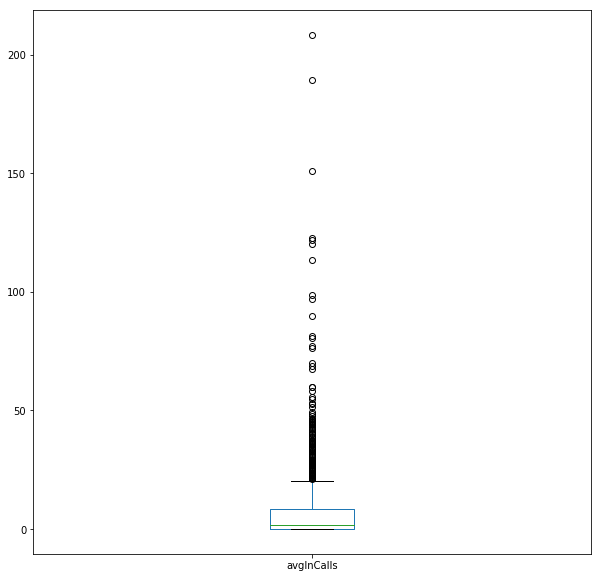

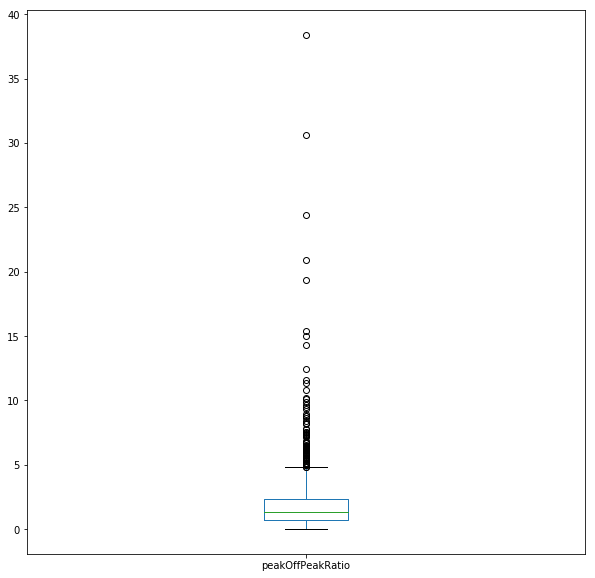

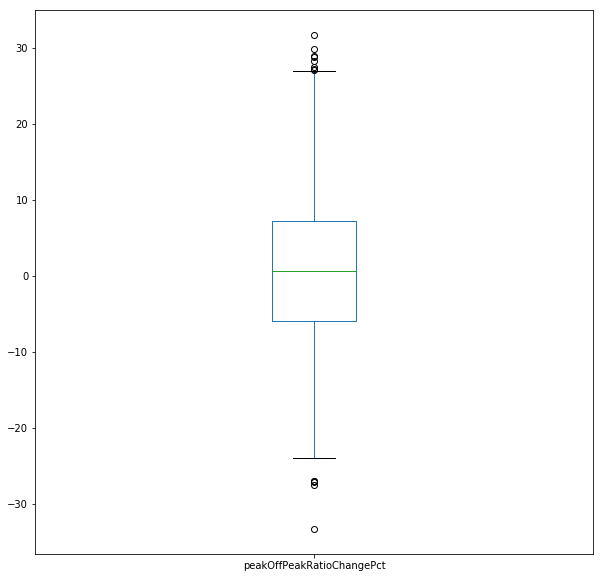

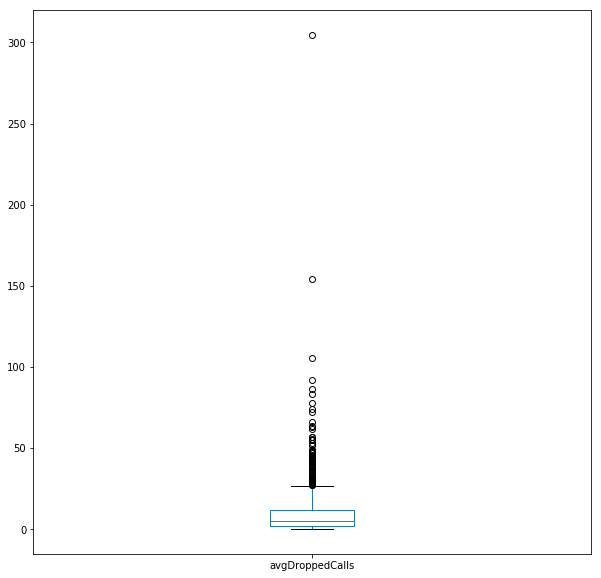

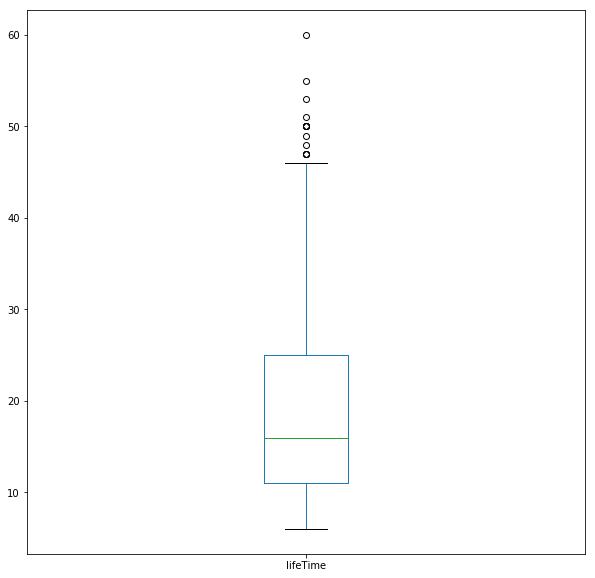

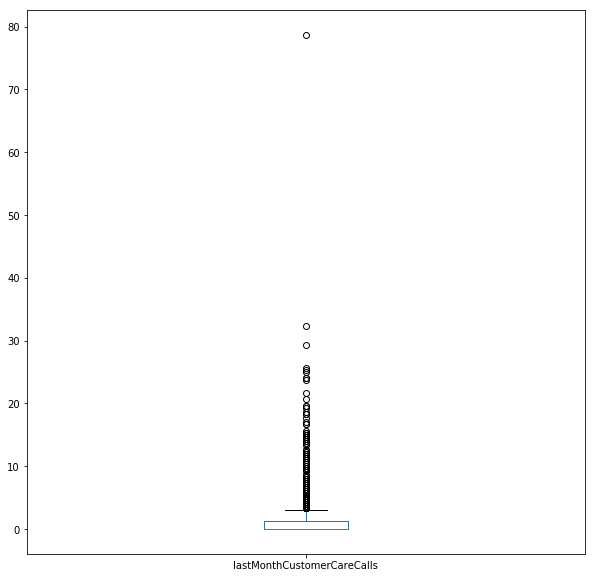

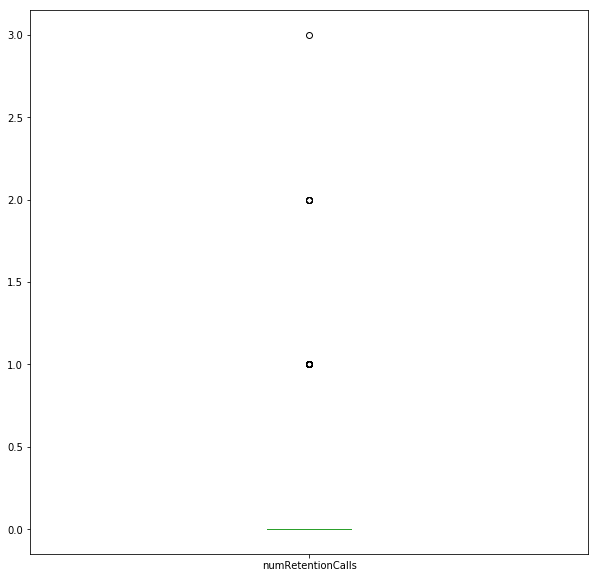

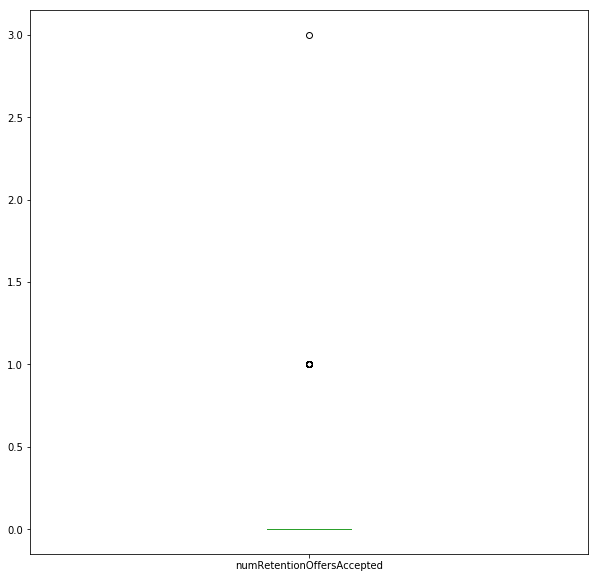

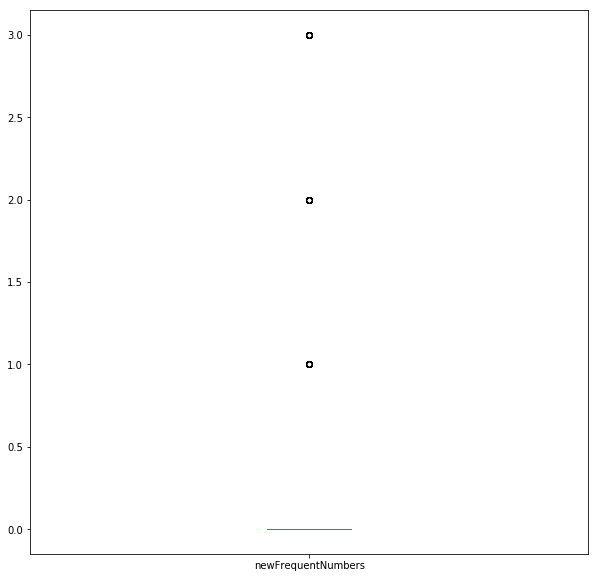

In [15]:
"""
Taken from Lab4
"""
# Plot box plots for all the continuous features and save in a PDF file
pp = PdfPages('continuous_box_plots.pdf')

for col in continuous_columns:
    f = df[col].plot(kind='box', figsize=(10,10))
    pp.savefig(f.get_figure())
    plt.show()

    
pp.close()

## Plot Bar Plots for Categorical Features

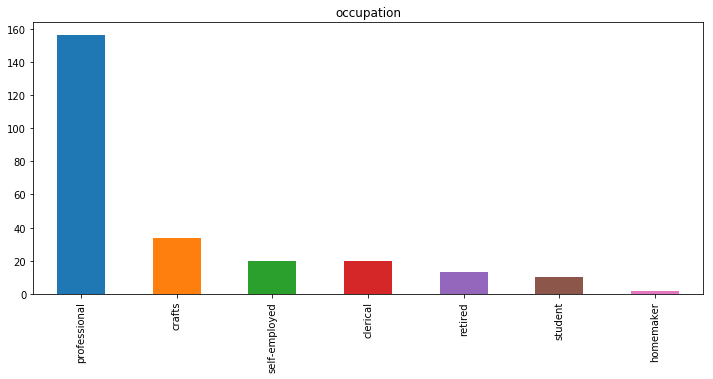

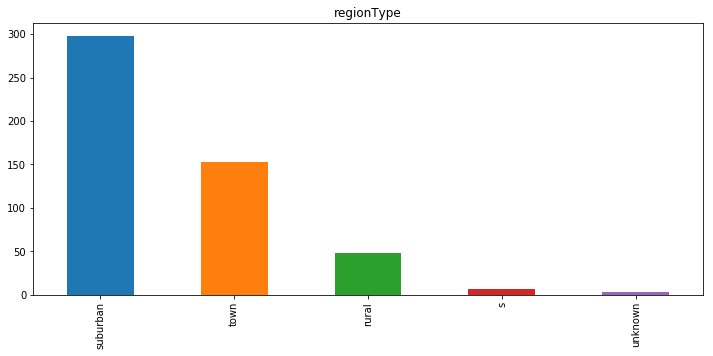

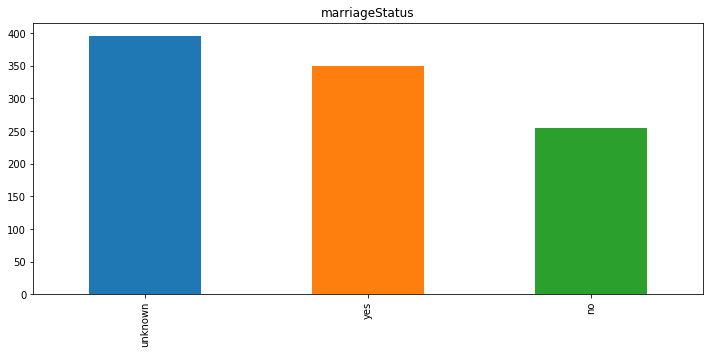

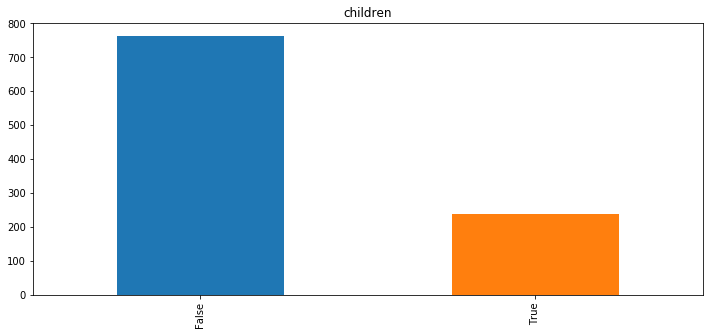

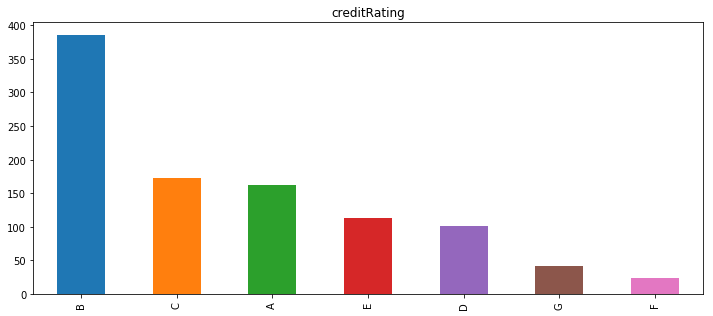

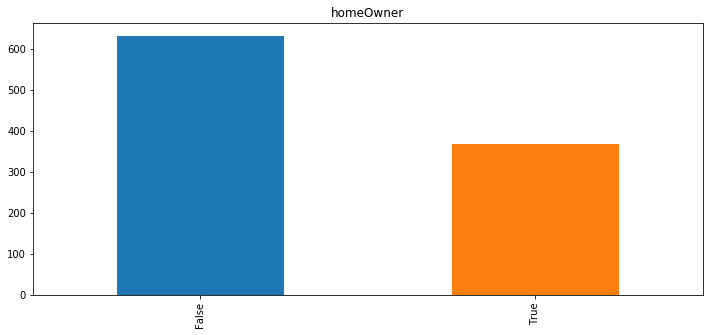

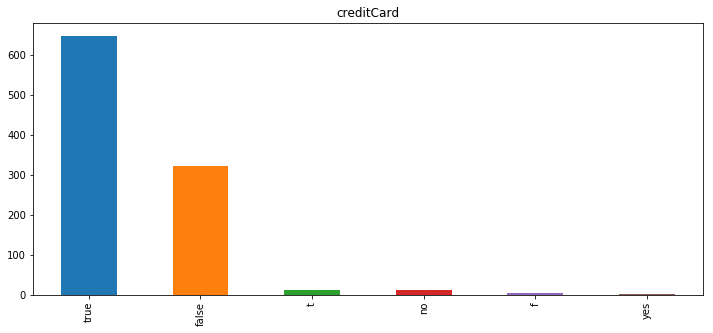

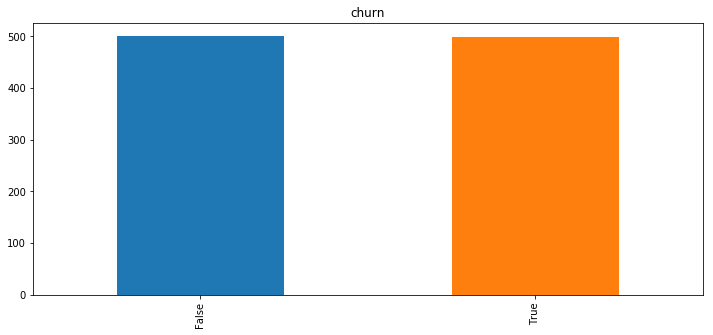

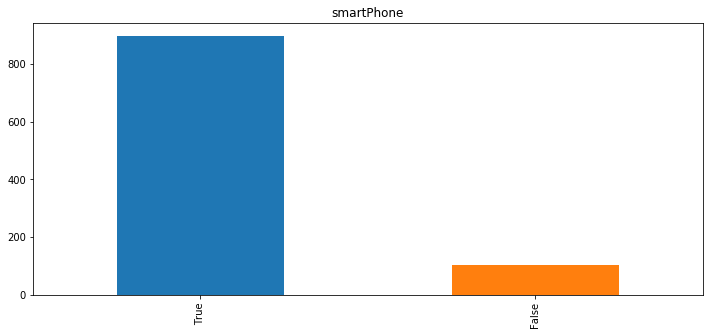

In [16]:
"""
Taken from Lab4
"""
# Plot bar charts for all categorical features and save them in a single PDF file
pp = PdfPages('categorical_bar_charts.pdf')

for column in categorical_columns:
    f = df[column].value_counts().plot(kind='bar', title=column, figsize=(12,5))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

## Comments on Bar Plots

It is clear that some of thefeatures have irregualr cardinality such as creditCard and this will need to be addressed.

# Data quality plan

## Irregular cardinality

In [17]:
"""
Taken from lab4
"""
# Check for irregular cardinality in categorical features. There could be same values spelled differently
print("Unique values for:\n\n- occupation:", pd.unique(df.occupation.ravel()))
print("\n- regionType:", pd.unique(df.regionType.ravel()))
print("\n- marriageStatus:", sorted(pd.unique(df.marriageStatus.ravel())))
print("\n- children:", sorted(pd.unique(df.children.ravel())))
print("\n- creditRating:", sorted(pd.unique(df.creditRating.ravel())))
print("\n- homeOwner:", sorted(pd.unique(df.homeOwner.ravel())))
print("\n- creditCard:", sorted(pd.unique(df.creditCard.ravel())))
print("\n- churn:", sorted(pd.unique(df.churn.ravel())))

Unique values for:

- occupation: [nan 'professional' 'student' 'self-employed' 'crafts' 'clerical'
 'homemaker' 'retired']

- regionType: [nan 'town' 'suburban' 'rural' 's' 'unknown']

- marriageStatus: ['no', 'unknown', 'yes']

- children: [False, True]

- creditRating: ['A', 'B', 'C', 'D', 'E', 'F', 'G']

- homeOwner: [False, True]

- creditCard: ['f', 'false', 'no', 't', 'true', 'yes']

- churn: [False, True]


Cardinality Issues: creditCard contains same values spelled differently

# Null Values

In [18]:
"""
Taken from Lab4
"""
df_cleaned.isnull().sum()

customer                        0
age                             0
occupation                    745
regionType                    492
marriageStatus                  0
children                        0
income                          0
numHandsets                     0
handsetAge                      0
smartPhone                      0
currentHandsetPrice             0
creditRating                    0
homeOwner                       0
creditCard                      0
avgBill                         0
avgMins                         0
avgrecurringCharge              0
avgOverBundleMins               0
avgRoamCalls                    0
callMinutesChangePct            0
billAmountChangePct             0
avgReceivedMins                 0
avgOutCalls                     0
avgInCalls                      0
peakOffPeakRatio                0
peakOffPeakRatioChangePct       0
avgDroppedCalls                 0
lifeTime                        0
lastMonthCustomerCareCalls      0
numRetentionCa

occupation and region type have a large amount of missing data and should be removed

In [19]:
#redefine continuous_columns and categorical_columns for df_cleaned
continuous_columns = df_cleaned.select_dtypes(include=['int64','float64']).columns
categorical_columns = df_cleaned.select_dtypes(include=['category']).columns

In [20]:
for i in continuous_columns:
    print("Number of 0's in",i,"is",df[(df[i]==0)].shape[0])

Number of 0's in customer is 0
Number of 0's in age is 313
Number of 0's in income is 265
Number of 0's in numHandsets is 0
Number of 0's in handsetAge is 0
Number of 0's in currentHandsetPrice is 583
Number of 0's in avgBill is 1
Number of 0's in avgMins is 12
Number of 0's in avgrecurringCharge is 3
Number of 0's in avgOverBundleMins is 424
Number of 0's in avgRoamCalls is 685
Number of 0's in callMinutesChangePct is 18
Number of 0's in billAmountChangePct is 123
Number of 0's in avgReceivedMins is 127
Number of 0's in avgOutCalls is 144
Number of 0's in avgInCalls is 324
Number of 0's in peakOffPeakRatio is 97
Number of 0's in peakOffPeakRatioChangePct is 0
Number of 0's in avgDroppedCalls is 126
Number of 0's in lifeTime is 0
Number of 0's in lastMonthCustomerCareCalls is 553
Number of 0's in numRetentionCalls is 950
Number of 0's in numRetentionOffersAccepted is 976
Number of 0's in newFrequentNumbers is 898


Age and currentHandset price have a large amount of 0s whcih does not make sense. In the case of age I believe imputation makes sense as only ~30% of values are missing and age is an important feature. currentHandsetPrice has too many values missing to be of use and will be dropped. 

0 values make sense for the other continuous features, but it is worth mentioning why I decided to keep the 0 values for income since there are ~26% 0 values. I believe this isn't unreasonable for income as many of the customers may be dependents whose bill is paid for by someone else.

#  Outliers

Looking at the extreme values for outliers to try to determine if they are valid or errors in the data.

In [21]:
df_cleaned.sort_values(by='numHandsets', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
313,1001041,0,NaN,NaN,unknown,False,0,21,318,True,29.99,B,True,false,35.24,421.00,44.99,0.0,0.00,2.220,0.0148,18.49,27.33,3.33,1.113952,-18.162070,11.00,46,6.67,0,0,3,False
878,1005284,56,professional,town,yes,False,9,9,261,True,29.99,C,False,true,487.39,3746.75,94.99,1437.0,1.18,-2.515,-2.3524,852.83,280.00,189.33,2.157864,2.849033,154.33,32,8.67,0,0,0,False
961,1004272,0,NaN,NaN,unknown,False,0,9,20,True,199.99,G,True,false,44.30,384.75,49.75,2.0,0.00,-1.455,-0.1792,95.21,21.00,18.33,2.212182,-6.518300,5.33,36,6.33,0,0,0,True
159,1002795,0,NaN,NaN,unknown,False,0,8,85,True,79.99,C,True,false,85.20,1266.25,86.28,0.0,2.24,0.255,0.2602,376.11,67.00,30.33,1.207250,-11.364367,17.00,41,1.00,1,1,0,False
460,1006044,0,NaN,NaN,unknown,False,0,8,632,True,59.99,A,True,false,36.92,375.25,44.99,5.5,0.00,1.615,0.1156,74.40,12.67,4.00,1.146537,4.398883,18.67,38,0.00,0,0,0,True


In [22]:
df_cleaned.sort_values(by='handsetAge', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
824,1000004,26,crafts,town,yes,True,6,1,1812,False,0.0,C,True,true,38.00,7.50,38.0,0.00,0.0,-0.030,0.0000,0.41,0.33,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,False
870,1097866,0,NaN,suburban,unknown,False,0,1,1668,False,0.0,A,True,false,3.63,9.50,0.0,3.50,0.0,0.110,0.0526,0.08,0.00,0.00,1.330000,-2.979570,0.33,55,0.00,0,0,0,False
113,1000482,0,NaN,suburban,unknown,False,0,1,1548,False,0.0,D,True,false,56.28,483.00,50.0,43.50,0.0,0.740,-0.0462,50.33,3.33,0.00,5.751055,-3.111156,7.00,51,0.67,0,0,0,True
338,1001099,42,NaN,rural,yes,False,7,1,1506,False,0.0,A,False,true,30.00,12.00,30.0,0.00,0.0,0.140,0.0000,1.56,1.67,0.33,0.320528,21.487189,3.33,50,1.00,0,0,0,True
651,1000787,48,professional,town,yes,False,7,1,1463,False,0.0,A,False,true,95.10,817.75,30.0,150.75,0.0,11.945,0.8070,167.79,29.00,2.33,1.168111,6.673847,3.67,48,0.00,0,0,1,False


In [23]:
df_cleaned.sort_values(by='currentHandsetPrice', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
53,1094858,44,NaN,NaN,unknown,False,5,2,161,True,499.99,C,True,true,60.97,1884.00,59.99,16.25,0.00,2.540,0.0640,832.47,121.33,97.00,0.625720,-3.767034,10.67,9,15.67,0,0,0,False
741,1089035,40,NaN,suburban,yes,True,3,2,287,True,199.99,B,False,true,54.87,543.25,59.99,0.00,0.88,2.575,-0.0098,158.94,6.00,5.67,4.410930,-4.241968,11.33,11,0.00,0,0,0,False
621,1039850,26,NaN,suburban,no,False,7,4,303,True,199.99,B,False,t,71.92,1832.75,69.99,8.50,0.00,-0.855,-0.0296,286.52,177.33,41.00,0.589189,10.105939,48.00,20,0.00,0,0,0,True
27,1053569,0,NaN,suburban,unknown,False,0,4,66,True,199.99,F,True,false,62.63,678.25,49.99,5.75,0.00,4.695,-0.0374,98.46,13.00,1.00,1.876813,-0.928734,9.67,18,0.00,0,0,0,True
785,1071018,78,retired,NaN,no,False,7,2,82,True,199.99,B,False,true,29.99,771.00,26.99,10.00,0.00,-0.140,-0.5998,0.14,0.00,0.00,1.056070,11.279446,2.33,12,4.00,2,1,0,True


In [24]:
df_cleaned.sort_values(by='avgBill', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
269,1086259,32,NaN,NaN,no,False,4,2,199,True,199.99,B,False,true,503.91,6103.75,200.15,1912.50,23.09,3.485,0.8602,1817.74,233.33,23.67,1.740581,7.609037,55.33,8,0.00,0,0,0,False
878,1005284,56,professional,town,yes,False,9,9,261,True,29.99,C,False,true,487.39,3746.75,94.99,1437.00,1.18,-2.515,-2.3524,852.83,280.00,189.33,2.157864,2.849033,154.33,32,8.67,0,0,0,False
405,1046468,0,NaN,town,unknown,False,0,3,95,True,199.99,E,True,false,393.09,1812.25,84.99,29.00,0.00,-16.605,-5.5680,194.70,141.33,60.00,1.210092,-9.859415,105.67,14,15.00,2,1,0,True
376,1081687,44,NaN,suburban,no,True,6,1,313,True,0.00,B,False,true,297.07,2121.50,44.99,737.25,0.00,5.950,1.2714,1533.55,32.00,6.67,0.387980,2.644611,36.00,11,1.00,0,0,0,True
399,1069086,42,NaN,NaN,unknown,False,5,3,199,True,129.99,B,False,false,292.78,2752.75,84.99,848.75,0.00,22.065,4.0070,816.43,92.00,122.00,2.171085,-5.869010,56.67,11,0.00,0,0,2,True


In [25]:
df_cleaned.sort_values(by='avgMins', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
269,1086259,32,NaN,NaN,no,False,4,2,199,True,199.99,B,False,true,503.91,6103.75,200.15,1912.50,23.09,3.485,0.8602,1817.74,233.33,23.67,1.740581,7.609037,55.33,8,0.00,0,0,0,False
878,1005284,56,professional,town,yes,False,9,9,261,True,29.99,C,False,true,487.39,3746.75,94.99,1437.00,1.18,-2.515,-2.3524,852.83,280.00,189.33,2.157864,2.849033,154.33,32,8.67,0,0,0,False
506,1074798,0,NaN,town,unknown,False,0,4,162,True,99.99,D,True,false,171.90,3189.75,123.12,186.00,1.31,-9.895,-0.3582,898.96,418.33,208.33,0.707137,-7.946491,56.67,12,17.67,0,0,0,False
745,1050781,58,NaN,NaN,no,False,7,5,138,True,79.99,D,False,true,195.01,2928.50,130.27,332.25,0.00,35.890,1.3154,842.57,226.67,151.00,0.852274,5.991712,51.67,14,25.00,0,0,0,True
390,1070134,28,NaN,suburban,yes,False,4,2,88,True,149.99,D,False,true,258.54,2804.75,75.20,469.00,0.32,-14.875,-1.1428,1731.08,24.67,0.00,1.369048,-15.079453,19.33,15,15.00,0,0,0,False


In [26]:
df_cleaned.sort_values(by='avgrecurringCharge', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
269,1086259,32,NaN,NaN,no,False,4,2,199,True,199.99,B,False,true,503.91,6103.75,200.15,1912.5,23.09,3.485,0.8602,1817.74,233.33,23.67,1.740581,7.609037,55.33,8,0.00,0,0,0,False
711,1039747,30,NaN,town,unknown,False,3,1,597,True,0.00,B,True,false,151.48,400.25,169.98,0.0,0.00,7.375,0.0000,48.22,16.00,12.67,1.553889,-19.176883,5.00,20,0.00,0,0,0,True
954,1002754,0,NaN,suburban,unknown,False,0,7,60,True,149.99,E,True,false,177.63,2317.75,159.99,0.0,3.88,-5.135,-0.0974,509.62,126.00,37.33,0.804705,9.017458,10.00,43,1.00,1,0,0,False
643,1002209,44,NaN,NaN,yes,False,4,2,298,True,29.99,A,False,true,165.18,415.25,159.99,8.0,0.00,0.475,-0.0388,48.40,16.67,14.33,2.472222,8.321582,6.00,46,0.33,0,0,0,False
167,1023841,0,NaN,suburban,unknown,False,0,2,419,True,79.99,A,True,false,160.86,1175.50,157.49,0.0,3.37,0.110,-0.0128,330.21,79.00,16.67,3.341956,-1.206834,15.00,25,0.00,0,0,0,True


In [27]:
df_cleaned.sort_values(by='avgOverBundleMins', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
269,1086259,32,NaN,NaN,no,False,4,2,199,True,199.99,B,False,true,503.91,6103.75,200.15,1912.50,23.09,3.485,0.8602,1817.74,233.33,23.67,1.740581,7.609037,55.33,8,0.00,0,0,0,False
878,1005284,56,professional,town,yes,False,9,9,261,True,29.99,C,False,true,487.39,3746.75,94.99,1437.00,1.18,-2.515,-2.3524,852.83,280.00,189.33,2.157864,2.849033,154.33,32,8.67,0,0,0,False
399,1069086,42,NaN,NaN,unknown,False,5,3,199,True,129.99,B,False,false,292.78,2752.75,84.99,848.75,0.00,22.065,4.0070,816.43,92.00,122.00,2.171085,-5.869010,56.67,11,0.00,0,0,2,True
376,1081687,44,NaN,suburban,no,True,6,1,313,True,0.00,B,False,true,297.07,2121.50,44.99,737.25,0.00,5.950,1.2714,1533.55,32.00,6.67,0.387980,2.644611,36.00,11,1.00,0,0,0,True
763,1063149,60,NaN,NaN,no,False,6,2,4,False,149.99,C,False,true,260.95,1148.00,33.78,665.75,0.17,-13.140,-4.1216,372.99,48.33,4.00,0.931190,-9.432071,3.33,16,1.00,0,0,0,False


In [28]:
df_cleaned.sort_values(by='avgRoamCalls', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
172,1038966,0,NaN,NaN,unknown,False,0,3,176,True,129.99,C,True,false,169.50,765.00,57.41,107.25,77.31,5.400,0.8826,72.30,7.00,2.00,0.704449,3.287992,6.00,16,6.67,0,0,0,True
479,1010018,38,NaN,town,yes,True,6,3,488,True,29.99,B,False,true,189.83,2249.75,84.99,144.00,72.86,-14.515,-1.5784,387.79,48.00,4.67,1.352273,3.387717,47.00,31,4.00,0,0,0,False
828,1083996,52,NaN,suburban,yes,True,9,1,367,True,0.00,B,False,true,209.86,1153.50,12.33,438.00,67.05,-22.910,-4.1972,514.96,58.33,0.00,4.122405,14.949651,13.67,13,0.00,1,0,0,False
327,1020277,56,NaN,town,yes,True,9,2,237,True,29.99,B,False,true,133.30,730.50,50.00,40.50,64.68,-2.510,-1.0586,132.74,30.00,4.33,2.852226,-5.764596,23.67,26,0.00,0,0,0,True
286,1034276,0,NaN,NaN,no,False,5,1,550,True,0.00,C,True,false,116.91,279.00,50.00,0.00,62.97,-5.560,-1.2732,13.40,34.33,2.67,1.321724,1.551805,8.67,18,0.00,0,0,0,True


In [29]:
df_cleaned.sort_values(by='callMinutesChangePct', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
41,1063386,0,NaN,NaN,unknown,False,0,1,362,True,0.00,G,True,false,106.99,1359.75,39.11,250.75,0.78,44.005,1.3394,161.74,37.67,5.67,0.490328,2.045090,20.67,12,14.67,0,0,0,False
745,1050781,58,NaN,NaN,no,False,7,5,138,True,79.99,D,False,true,195.01,2928.50,130.27,332.25,0.00,35.890,1.3154,842.57,226.67,151.00,0.852274,5.991712,51.67,14,25.00,0,0,0,True
238,1073387,30,NaN,NaN,no,False,0,3,18,True,79.99,G,True,false,186.49,2025.50,113.68,452.50,0.00,32.710,2.5394,605.43,73.67,76.33,1.042776,14.015841,32.00,10,8.33,0,0,0,False
538,1084669,0,NaN,NaN,unknown,False,0,2,75,True,129.99,G,True,false,199.12,1394.25,48.87,352.50,0.00,30.895,4.8744,320.80,57.67,36.00,0.805803,-10.818285,41.33,6,5.33,0,0,0,True
770,1067795,50,student,NaN,no,True,6,3,67,True,199.99,B,False,true,153.81,2195.50,62.49,324.25,0.33,25.190,3.4982,632.30,63.00,18.33,1.056550,4.018482,11.67,11,2.33,0,0,0,False


In [30]:
df_cleaned.sort_values(by='callMinutesChangePct', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').tail(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
882,1050166,44,NaN,NaN,no,True,2,1,498,True,0.00,E,False,true,61.35,878.50,45.00,65.50,0.00,-17.570,-3.1518,204.63,51.00,18.00,0.945119,-12.645801,29.33,17,1.33,0,0,0,False
663,1061308,28,NaN,suburban,no,False,3,1,313,True,0.00,B,False,true,127.29,1860.25,84.99,166.75,0.00,-20.925,-1.0262,432.69,62.33,29.33,2.440949,-14.953357,21.67,10,1.67,0,0,0,True
828,1083996,52,NaN,suburban,yes,True,9,1,367,True,0.00,B,False,true,209.86,1153.50,12.33,438.00,67.05,-22.910,-4.1972,514.96,58.33,0.00,4.122405,14.949651,13.67,13,0.00,1,0,0,False
732,1076203,32,clerical,suburban,no,False,5,3,56,True,149.99,D,True,true,111.48,1170.50,31.56,295.00,0.00,-23.410,-2.2296,109.34,15.33,2.67,2.344828,4.088351,14.00,11,4.67,0,0,0,False
585,1046536,0,NaN,NaN,unknown,False,0,4,253,True,59.99,G,True,false,170.13,1488.25,84.99,213.00,0.00,-29.765,-1.7428,903.49,61.67,81.33,1.414204,3.596764,15.00,18,3.33,0,0,0,True


In [31]:
df_cleaned.sort_values(by='billAmountChangePct', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
538,1084669,0,NaN,NaN,unknown,False,0,2,75,True,129.99,G,True,false,199.12,1394.25,48.87,352.50,0.00,30.895,4.8744,320.80,57.67,36.00,0.805803,-10.818285,41.33,6,5.33,0,0,0,True
399,1069086,42,NaN,NaN,unknown,False,5,3,199,True,129.99,B,False,false,292.78,2752.75,84.99,848.75,0.00,22.065,4.0070,816.43,92.00,122.00,2.171085,-5.869010,56.67,11,0.00,0,0,2,True
960,1092130,50,professional,NaN,yes,False,7,1,195,True,0.00,C,False,true,116.17,766.75,47.49,69.75,0.52,5.965,3.8972,148.51,76.00,6.67,0.779415,7.608664,36.00,6,4.67,0,0,1,True
770,1067795,50,student,NaN,no,True,6,3,67,True,199.99,B,False,true,153.81,2195.50,62.49,324.25,0.33,25.190,3.4982,632.30,63.00,18.33,1.056550,4.018482,11.67,11,2.33,0,0,0,False
161,1018158,66,professional,NaN,no,False,6,2,189,True,9.99,D,True,true,105.98,430.25,45.63,143.50,1.18,17.815,3.1556,51.41,4.67,0.00,4.167500,-1.668526,2.00,29,0.33,0,0,0,True


In [32]:
df_cleaned.sort_values(by='billAmountChangePct', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').tail(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
332,1033284,36,NaN,NaN,unknown,False,6,2,390,True,29.99,E,False,true,167.20,870.50,24.58,464.25,0.00,-17.410,-3.3440,153.39,43.67,16.00,4.428878,6.321531,20.00,22,1.67,0,0,2,False
496,1028585,32,NaN,NaN,no,False,4,1,579,True,0.00,C,False,true,188.00,801.25,22.50,468.25,0.00,-9.725,-3.7530,128.24,94.33,4.67,3.391109,8.121092,36.33,19,0.00,1,0,0,False
763,1063149,60,NaN,NaN,no,False,6,2,4,False,149.99,C,False,true,260.95,1148.00,33.78,665.75,0.17,-13.140,-4.1216,372.99,48.33,4.00,0.931190,-9.432071,3.33,16,1.00,0,0,0,False
828,1083996,52,NaN,suburban,yes,True,9,1,367,True,0.00,B,False,true,209.86,1153.50,12.33,438.00,67.05,-22.910,-4.1972,514.96,58.33,0.00,4.122405,14.949651,13.67,13,0.00,1,0,0,False
405,1046468,0,NaN,town,unknown,False,0,3,95,True,199.99,E,True,false,393.09,1812.25,84.99,29.00,0.00,-16.605,-5.5680,194.70,141.33,60.00,1.210092,-9.859415,105.67,14,15.00,2,1,0,True


In [33]:
df_cleaned.sort_values(by='avgReceivedMins', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
269,1086259,32,NaN,NaN,no,False,4,2,199,True,199.99,B,False,true,503.91,6103.75,200.15,1912.50,23.09,3.485,0.8602,1817.74,233.33,23.67,1.740581,7.609037,55.33,8,0.00,0,0,0,False
390,1070134,28,NaN,suburban,yes,False,4,2,88,True,149.99,D,False,true,258.54,2804.75,75.20,469.00,0.32,-14.875,-1.1428,1731.08,24.67,0.00,1.369048,-15.079453,19.33,15,15.00,0,0,0,False
376,1081687,44,NaN,suburban,no,True,6,1,313,True,0.00,B,False,true,297.07,2121.50,44.99,737.25,0.00,5.950,1.2714,1533.55,32.00,6.67,0.387980,2.644611,36.00,11,1.00,0,0,0,True
585,1046536,0,NaN,NaN,unknown,False,0,4,253,True,59.99,G,True,false,170.13,1488.25,84.99,213.00,0.00,-29.765,-1.7428,903.49,61.67,81.33,1.414204,3.596764,15.00,18,3.33,0,0,0,True
506,1074798,0,NaN,town,unknown,False,0,4,162,True,99.99,D,True,false,171.90,3189.75,123.12,186.00,1.31,-9.895,-0.3582,898.96,418.33,208.33,0.707137,-7.946491,56.67,12,17.67,0,0,0,False


In [34]:
df_cleaned.sort_values(by='avgOutCalls', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
506,1074798,0,NaN,town,unknown,False,0,4,162,True,99.99,D,True,false,171.90,3189.75,123.12,186.00,1.31,-9.895,-0.3582,898.96,418.33,208.33,0.707137,-7.946491,56.67,12,17.67,0,0,0,False
176,1074625,0,NaN,suburban,unknown,False,4,2,141,True,149.99,E,False,true,121.41,1548.00,75.73,234.50,14.95,-7.480,-0.1008,485.46,332.00,122.67,1.402511,1.216359,62.00,14,6.67,0,0,0,True
878,1005284,56,professional,town,yes,False,9,9,261,True,29.99,C,False,true,487.39,3746.75,94.99,1437.00,1.18,-2.515,-2.3524,852.83,280.00,189.33,2.157864,2.849033,154.33,32,8.67,0,0,0,False
269,1086259,32,NaN,NaN,no,False,4,2,199,True,199.99,B,False,true,503.91,6103.75,200.15,1912.50,23.09,3.485,0.8602,1817.74,233.33,23.67,1.740581,7.609037,55.33,8,0.00,0,0,0,False
745,1050781,58,NaN,NaN,no,False,7,5,138,True,79.99,D,False,true,195.01,2928.50,130.27,332.25,0.00,35.890,1.3154,842.57,226.67,151.00,0.852274,5.991712,51.67,14,25.00,0,0,0,True


In [35]:
df_cleaned.sort_values(by='avgInCalls', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
506,1074798,0,NaN,town,unknown,False,0,4,162,True,99.99,D,True,false,171.90,3189.75,123.12,186.00,1.31,-9.895,-0.3582,898.96,418.33,208.33,0.707137,-7.946491,56.67,12,17.67,0,0,0,False
878,1005284,56,professional,town,yes,False,9,9,261,True,29.99,C,False,true,487.39,3746.75,94.99,1437.00,1.18,-2.515,-2.3524,852.83,280.00,189.33,2.157864,2.849033,154.33,32,8.67,0,0,0,False
745,1050781,58,NaN,NaN,no,False,7,5,138,True,79.99,D,False,true,195.01,2928.50,130.27,332.25,0.00,35.890,1.3154,842.57,226.67,151.00,0.852274,5.991712,51.67,14,25.00,0,0,0,True
176,1074625,0,NaN,suburban,unknown,False,4,2,141,True,149.99,E,False,true,121.41,1548.00,75.73,234.50,14.95,-7.480,-0.1008,485.46,332.00,122.67,1.402511,1.216359,62.00,14,6.67,0,0,0,True
399,1069086,42,NaN,NaN,unknown,False,5,3,199,True,129.99,B,False,false,292.78,2752.75,84.99,848.75,0.00,22.065,4.0070,816.43,92.00,122.00,2.171085,-5.869010,56.67,11,0.00,0,0,2,True


In [36]:
df_cleaned.sort_values(by='peakOffPeakRatio', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
874,1065878,60,professional,town,no,False,4,2,33,True,149.99,C,False,true,59.26,33.00,49.99,0.00,0.00,-0.340,0.5144,1.98,4.33,0.33,38.393939,-5.060513,1.00,9,0.00,0,0,0,False
984,1020919,50,professional,NaN,yes,False,7,1,836,True,0.00,B,False,true,46.17,191.00,29.99,34.25,0.00,-1.640,-0.3236,32.16,9.00,3.33,30.630631,-2.055417,4.67,28,0.00,0,0,0,False
59,1048705,0,NaN,NaN,unknown,False,0,1,402,True,0.00,D,True,false,171.29,1406.25,149.99,0.00,19.32,2.215,-0.1632,474.30,39.00,7.67,24.431358,3.488956,16.67,13,4.00,0,0,0,False
727,1016347,0,NaN,NaN,unknown,False,0,1,892,False,0.00,D,True,false,28.74,168.00,30.41,3.75,0.00,-0.840,0.2850,23.57,4.67,0.00,20.888412,-0.618078,6.33,30,2.33,0,0,0,False
971,1015024,36,professional,town,yes,False,9,5,192,True,39.99,C,False,true,121.94,610.75,59.99,197.50,1.39,2.785,0.6720,122.37,2.67,4.00,19.373777,2.981875,18.33,25,0.00,1,1,0,True


In [37]:
df_cleaned.sort_values(by='peakOffPeakRatioChangePct', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
836,1079457,62,NaN,suburban,yes,False,5,1,319,True,0.00,B,False,true,10.10,26.50,10.00,0.0,0.10,-0.370,-0.0020,4.30,0.00,0.00,2.492537,31.693224,0.00,11,0.00,0,0,0,False
577,1075541,42,professional,town,yes,True,7,1,396,True,0.00,B,False,true,30.49,168.00,39.99,0.0,0.00,1.620,0.0100,12.80,2.67,0.00,3.963806,29.889112,0.67,14,0.00,0,0,0,True
43,1024889,0,NaN,NaN,unknown,False,0,4,162,True,99.99,G,True,false,150.48,986.75,69.99,264.0,0.90,-0.575,-0.5360,276.19,97.67,37.33,2.975946,28.951192,13.00,26,0.67,0,0,0,True
811,1041901,46,professional,NaN,yes,False,9,1,468,True,0.00,B,False,true,80.87,204.00,75.00,0.0,5.19,-1.100,0.2824,21.24,8.00,0.00,8.943715,28.845972,8.33,15,0.00,0,0,0,False
26,1046990,50,NaN,NaN,unknown,False,7,1,588,True,0.00,A,False,true,12.33,234.25,10.00,0.0,0.10,-1.465,-0.0386,14.00,27.00,0.00,5.807275,28.245281,4.67,20,0.00,0,0,0,True


In [38]:
df_cleaned.sort_values(by='peakOffPeakRatioChangePct', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').tail(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
839,1089103,0,NaN,NaN,unknown,False,0,2,185,True,149.99,C,True,false,72.08,693.5,59.99,24.5,0.32,0.47,0.2976,60.78,53.33,3.33,1.133535,-26.979322,10.33,11,1.33,0,0,0,False
294,1096526,38,crafts,rural,no,True,1,1,211,True,0.00,E,False,true,68.80,1087.0,71.44,20.0,0.47,3.18,0.8198,63.10,9.00,0.33,0.915164,-27.000886,28.67,7,16.67,0,0,0,False
830,1055219,38,NaN,town,yes,False,9,1,348,True,0.00,B,False,true,39.05,115.5,44.99,0.0,0.00,-0.77,-0.0212,12.30,0.67,0.00,2.701340,-27.149472,1.33,11,0.00,0,0,0,True
697,1081823,44,professional,NaN,yes,False,9,2,211,True,29.99,B,False,true,70.63,350.5,59.99,30.5,0.00,-0.03,-0.2128,45.86,26.00,2.67,1.440189,-27.501123,7.33,9,0.33,0,0,0,False
303,1081217,56,professional,town,yes,False,6,2,276,True,199.99,B,False,true,53.99,492.0,59.99,0.0,0.00,-0.64,0.0000,140.61,17.00,13.67,1.731139,-33.320112,8.67,11,0.00,1,0,0,True


In [39]:
df_cleaned.sort_values(by='avgDroppedCalls', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
156,1065056,40,NaN,suburban,unknown,False,6,3,67,True,99.99,E,False,true,63.27,1539.00,59.99,25.25,0.00,-2.800,-0.0340,185.13,80.67,10.00,0.540112,-12.925283,304.67,10,17.00,0,0,0,False
878,1005284,56,professional,town,yes,False,9,9,261,True,29.99,C,False,true,487.39,3746.75,94.99,1437.00,1.18,-2.515,-2.3524,852.83,280.00,189.33,2.157864,2.849033,154.33,32,8.67,0,0,0,False
405,1046468,0,NaN,town,unknown,False,0,3,95,True,199.99,E,True,false,393.09,1812.25,84.99,29.00,0.00,-16.605,-5.5680,194.70,141.33,60.00,1.210092,-9.859415,105.67,14,15.00,2,1,0,True
797,1083851,0,NaN,NaN,unknown,False,0,1,368,True,0.00,C,True,false,89.56,767.50,44.99,154.50,0.00,-8.430,-1.0914,60.94,30.33,2.00,0.823529,-15.288148,92.00,13,0.00,0,0,1,True
205,1082298,22,NaN,rural,unknown,False,1,1,203,True,0.00,D,True,false,56.68,606.00,69.99,0.00,0.00,-12.120,0.0662,36.42,24.67,1.00,1.019902,-8.897345,86.33,7,2.00,0,0,0,False


In [40]:
df_cleaned.sort_values(by='lifeTime', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
824,1000004,26,crafts,town,yes,True,6,1,1812,False,0.00,C,True,true,38.00,7.50,38.00,0.00,0.0,-0.030,0.0000,0.41,0.33,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,False
870,1097866,0,NaN,suburban,unknown,False,0,1,1668,False,0.00,A,True,false,3.63,9.50,0.00,3.50,0.0,0.110,0.0526,0.08,0.00,0.00,1.330000,-2.979570,0.33,55,0.00,0,0,0,False
981,1097854,0,NaN,suburban,unknown,False,0,2,998,False,29.99,A,True,false,4.19,15.75,0.00,11.25,0.0,0.065,0.0072,4.65,0.33,0.67,0.582500,3.500026,1.33,53,0.00,0,0,3,False
113,1000482,0,NaN,suburban,unknown,False,0,1,1548,False,0.00,D,True,false,56.28,483.00,50.00,43.50,0.0,0.740,-0.0462,50.33,3.33,0.00,5.751055,-3.111156,7.00,51,0.67,0,0,0,True
351,1001019,40,professional,suburban,no,False,6,3,1109,False,29.99,A,False,true,29.99,70.50,29.99,0.00,0.0,-0.670,0.0000,11.34,0.00,0.00,6.816135,-14.330699,1.67,50,0.00,0,0,1,True


In [41]:
df_cleaned.sort_values(by='lastMonthCustomerCareCalls', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
435,1060466,38,NaN,NaN,no,False,1,1,380,False,0.00,E,False,true,89.58,1819.25,59.99,204.5,0.0,-10.005,0.0620,360.22,106.00,0.33,0.804766,6.986806,20.33,13,78.67,0,0,0,False
249,1018617,26,NaN,NaN,unknown,False,4,4,115,True,79.99,G,True,false,85.46,2747.75,59.99,69.5,0.0,-12.315,-0.5336,501.53,128.00,40.00,0.394291,-3.524375,45.00,27,32.33,0,0,0,False
589,1009439,38,NaN,unknown,no,False,4,7,9,True,79.99,E,False,true,175.86,2094.50,89.98,172.0,0.0,6.950,0.9998,678.08,120.67,44.00,1.157346,-12.957105,43.67,29,29.33,0,0,2,False
895,1062027,0,NaN,NaN,unknown,False,0,1,309,True,0.00,B,True,false,34.51,237.50,29.99,0.0,0.0,-0.350,-0.0104,39.13,9.33,0.00,2.061105,-15.594781,2.67,10,25.67,0,0,0,True
91,1049376,48,NaN,NaN,unknown,False,5,1,458,True,0.00,D,False,true,43.69,826.25,44.99,3.0,0.0,0.315,-0.1740,67.09,26.00,5.33,0.503448,-0.175779,14.00,15,25.33,0,0,0,False


In [42]:
df_cleaned.sort_values(by='numRetentionCalls', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
51,1007789,60,NaN,NaN,unknown,False,6,3,402,True,199.99,A,False,true,52.56,1200.25,75.28,188.0,0.0,-1.625,-0.8928,233.74,80.00,31.67,2.929937,-12.080290,17.33,33,1.33,3,3,0,True
405,1046468,0,NaN,town,unknown,False,0,3,95,True,199.99,E,True,false,393.09,1812.25,84.99,29.0,0.0,-16.605,-5.5680,194.70,141.33,60.00,1.210092,-9.859415,105.67,14,15.00,2,1,0,True
118,1016132,0,NaN,suburban,unknown,False,0,6,314,True,149.99,D,True,false,18.50,70.75,10.00,23.5,0.0,0.245,0.4900,15.04,16.00,2.00,2.000517,2.141612,1.33,28,0.00,2,0,0,False
785,1071018,78,retired,NaN,no,False,7,2,82,True,199.99,B,False,true,29.99,771.00,26.99,10.0,0.0,-0.140,-0.5998,0.14,0.00,0.00,1.056070,11.279446,2.33,12,4.00,2,1,0,True
482,1013610,38,NaN,suburban,unknown,False,4,3,232,True,29.99,A,False,true,14.19,17.75,10.00,4.0,0.0,-0.355,-0.0838,0.00,0.00,0.00,0.000000,5.646056,0.00,32,0.00,2,1,0,True


In [43]:
df_cleaned.sort_values(by='numRetentionOffersAccepted', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
51,1007789,60,NaN,NaN,unknown,False,6,3,402,True,199.99,A,False,true,52.56,1200.25,75.28,188.0,0.00,-1.625,-0.8928,233.74,80.00,31.67,2.929937,-12.080290,17.33,33,1.33,3,3,0,True
442,1019458,0,NaN,NaN,unknown,False,0,2,365,True,29.99,B,True,false,35.88,37.50,44.99,0.0,0.58,0.350,-0.0178,4.13,3.67,1.00,0.434159,-2.371963,1.67,23,0.00,1,1,0,True
852,1098106,0,NaN,NaN,unknown,False,0,3,749,True,9.99,C,True,false,11.68,399.50,10.00,0.0,0.00,-7.270,-0.0336,103.69,36.33,14.33,1.174381,-15.378938,8.67,41,0.00,1,1,0,True
785,1071018,78,retired,NaN,no,False,7,2,82,True,199.99,B,False,true,29.99,771.00,26.99,10.0,0.00,-0.140,-0.5998,0.14,0.00,0.00,1.056070,11.279446,2.33,12,4.00,2,1,0,True
713,1033936,0,NaN,NaN,unknown,False,0,3,89,True,29.99,C,True,false,61.55,398.50,39.99,3.5,0.00,-0.230,-0.1894,129.37,23.00,10.33,0.511728,6.519475,9.00,18,3.33,1,1,0,True


In [44]:
df_cleaned.sort_values(by='newFrequentNumbers', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
756,1009656,0,NaN,NaN,unknown,False,0,1,882,True,0.00,C,True,true,32.78,144.25,32.49,0.00,0.00,-2.345,-0.0058,5.41,4.33,1.67,2.728513,-4.596806,0.33,29,0.00,0,0,3,True
978,1063934,0,NaN,suburban,no,False,6,1,359,True,0.00,E,False,true,34.85,248.75,39.99,1.75,0.00,-0.375,-0.0172,48.41,12.33,0.00,1.290513,4.665610,1.33,12,19.67,0,0,3,False
972,1059485,0,NaN,NaN,unknown,False,0,1,323,True,0.00,E,True,false,17.73,133.50,10.86,19.00,0.00,-1.670,0.3150,39.18,11.67,3.33,2.245048,-10.613363,2.00,11,0.33,0,0,3,True
331,1065203,50,NaN,suburban,yes,True,8,2,224,True,59.99,A,False,true,53.22,738.75,70.66,7.00,0.00,3.005,-0.0646,87.28,38.67,15.67,0.855932,4.326910,16.33,10,1.00,0,0,3,False
794,1053188,22,NaN,NaN,no,False,2,1,364,True,0.00,B,False,true,79.50,869.25,69.99,73.00,0.15,0.595,0.1214,108.55,73.00,8.00,1.838317,-13.302806,5.00,12,6.33,0,0,3,True



None of the features above have outliers which are completely unreasonable and it is impossible to verify the validitiy of the extreme values without conferring with those who collected the data. Therefore I have decided to do nothing and to accept the values as valid keep them in the dataset

# Duplicate Rows

In [45]:
# Checking for duplicated rows
print(df_cleaned.set_index('customer').index.get_duplicates())
print(df_cleaned['customer'].nunique())

[]
1000


Since customer has a unique value ID for each row, there are no duplicate rows

# Addressing issues raised in data quality plan

| Feature                   | Data Quality Issue               | Handling Strategy                            |
|---------------------------|----------------------------------|----------------------------------------------|
| age                       | Missing Values (31.3%)           | Imputation - replace missing values with mean| 
| occupation                | Missing Values (74.5%)           | Drop feature                                 |
| regionType                | Missing Values (49.2%)           | Drop feature                                 |
| currentHandsetPrice       | Missing Values (58.3%)           | Drop feature                                 |
| marriageStatus            | Missing Values (39.6%)           | Drop feature                                 |
| customer                  | ID feature                       | Drop feature                                 |
| creditCard                | Irregular Cardinality            | Rename values                                |
| numHandsets               | Outliers                         | Do nothing                                   |
| handsetAge                | Outliers                         | Do nothing                                   |
| avgBill                   | Outliers                         | Do nothing                                   |
| avgMins                   | Outliers                         | Do nothing                                   |
| avgrecurringCharge        | Outliers                         | Do nothing                                   |
| avgOverBundleMins         | Outliers                         | Do nothing                                   |
| avgRoamCalls              | Outliers                         | Do nothing                                   |
| callMinutesChangePct      | Outliers                         | Do nothing                                   |
| billAmountChangePct       | Outliers                         | Do nothing                                   |
| avgReceivedMins           | Outliers                         | Do nothing                                   |
| avgOutCalls               | Outliers                         | Do nothing                                   |
| avgInCalls                | Outliers                         | Do nothing                                   |
| peakOffPeakRatioChangePct | Outliers                         | Do nothing                                   |
| avgDroppedCalls           | Outliers                         | Do nothing                                   |
| lifeTime                  | Outliers                         | Do nothing                                   |
| lastMonthCustomerCareCalls| Outliers                         | Do nothing                                   |
| numRetentionCalls         | Outliers                         | Do nothing                                   |
| numRetentionOffersAccepted| Outliers                         | Do nothing                                   |
| newFrequentNumbers        | Outliers                         | Do nothing                                   |

## Replace 0 values in age with mean

In [46]:
df_cleaned.age.replace(to_replace=0,value=df['age'].mean(),inplace=True)

Rename same values which have different spellings in creditCard

In [47]:
df_cleaned.creditCard.replace(to_replace='f',value='false',inplace=True)
df_cleaned.creditCard.replace(to_replace='no',value='false',inplace=True)
df_cleaned.creditCard.replace(to_replace='t',value='true',inplace=True)
df_cleaned.creditCard.replace(to_replace='yes',value='true',inplace=True)

## Drop features

In [48]:
df_cleaned.drop('occupation',1,inplace=True)

In [49]:
df_cleaned.drop('regionType',1,inplace=True)

In [50]:
df_cleaned.drop('currentHandsetPrice',1,inplace=True)

In [51]:
df_cleaned.drop('marriageStatus',1,inplace=True)

In [52]:
df_cleaned.drop('customer',1,inplace=True)

# Save updated CSV after applying Data Quality Plan solutions

In [53]:
df_cleaned.to_csv('CustomerChurnDataQualitySolutionsImplemented12751005.csv', index=False)

In [54]:
df_quality = df_cleaned
continuous_columns = df_quality.select_dtypes(include=['int64','float64']).columns
categorical_columns = df_quality.select_dtypes(include=['category']).columns

# Exploring the relationships between feature pairs

## Correlation Matrix

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

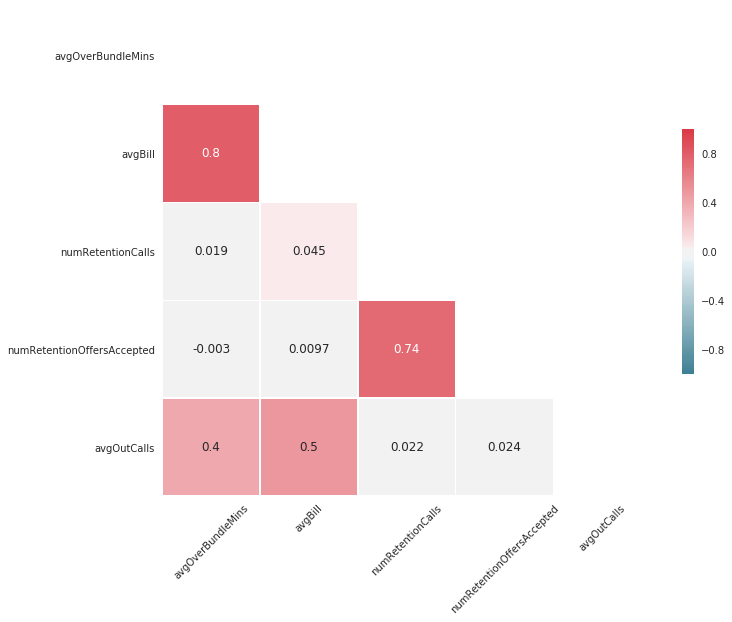

In [55]:
"""
Taken from Lab4
"""
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Select columns containing continuous data
# Calculate correlation of pairs of continuous features
columns = df_quality[['avgOverBundleMins','avgBill','numRetentionCalls','numRetentionOffersAccepted','avgOutCalls']].columns
corr = df_quality[columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

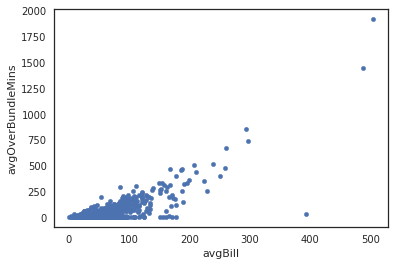

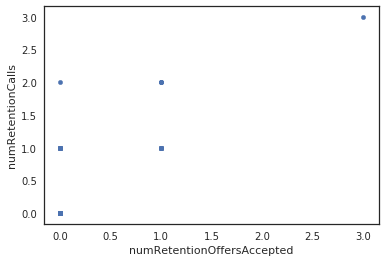

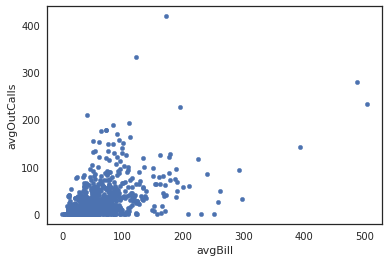

In [56]:
df_quality.plot(kind='scatter', x='avgBill', y='avgOverBundleMins')
df_quality.plot(kind='scatter', x='numRetentionOffersAccepted', y='numRetentionCalls')
df_quality.plot(kind='scatter', x='avgBill', y='avgOutCalls')

I decided on the above features because I though there would be a correlation between avgBill and avgOutCalls and avgOverBundleMins as well as between numRetentionCalls and numRetentionOffersAccepted.

Although these feature pairs did have strong correlations I found the scatterplots less indicative of a strong relationship between the features.

avgBill andavgOverBundleMins did seem to be reasonably strongly correlated but numRetentionCalls and numRetentionOffersAccepted did notseem to be very strongly correlated. One data point appeared to be having a significant influence and the calculation was based on very few data points.

As there wasn't too much useful information gained here, it would be worthwhile to look into the correlation between more feature pairs in the future.

## categorical-categorical feature plots

(0, 100)

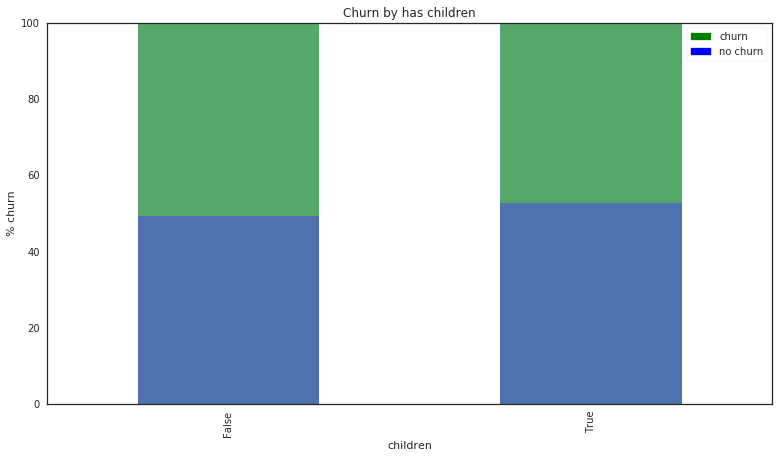

In [57]:
"""
Taken from Lab4
"""
# Count the number of customers with children
children = 1 / df_quality[df_quality.children == True].count()['children']

noChildren = 1 / df_quality[df_quality.children == False].count()['children']

# Create a new column in the dataframe called percent and insert children in all cells
df_quality['percent'] = children * 100

# Find indexes of all rows containing False for children
index_list = df_quality[df_quality['children'] == False].index.tolist()

# For each row with a 'female' value, insert female_count in the percent column
for i in index_list:
    df_quality.loc[i, 'percent'] = noChildren * 100

# Group dataframe by children and churn and sum precent
category_group = df_quality[['percent','children','churn']].groupby(['children','churn']).sum()

# Plot values of category_group in a stacked bar chart
my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Churn by has children", figsize=(13,7))

# Define legend colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='churn')
blue_patch = mpatches.Patch(color='blue', label='no churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("children")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

(0, 100)

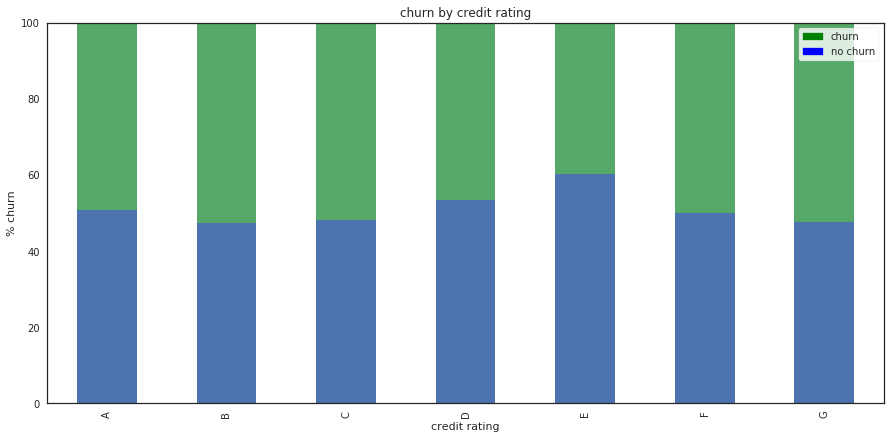

In [58]:
"""
Taken from Lab4
"""
# Find unique values in creditRating
credit = pd.unique(df_quality.creditRating.ravel())

# Insert a new column called 'percent' and fill it with 0s
df_quality['percent'] = 0

# Iterate through the unique values in Party and for each value count the amount of elected candidates
# Find the indexes of each row with a particular party amd for each of these row insert count * 100 in the percent column
for p in credit:
    count = 1 / df_quality[df_quality.creditRating == p].count()['churn']
    index_list = df_quality[df_quality['creditRating'] == p].index.tolist()
    for i in index_list:
        df_quality.loc[i, 'percent'] = count * 100
        
# Group dataframe by Party and Elected and sum percent
group = df_quality[['percent','creditRating','churn']].groupby(['creditRating','churn']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="churn by credit rating", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='churn')
blue_patch = mpatches.Patch(color='blue', label='no churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("credit rating")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])



(0, 100)

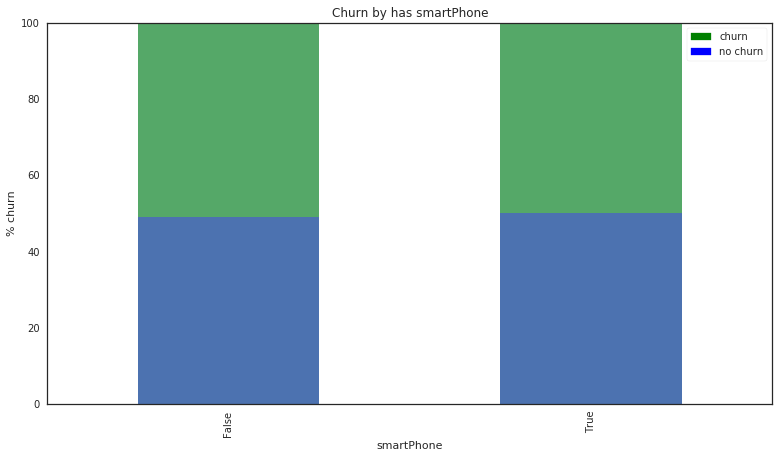

In [59]:
"""
Taken from Lab4
"""

smartPhone = 1 / df_quality[df_quality.smartPhone == True].count()['smartPhone']


nosmartPhone = 1 / df_quality[df_quality.smartPhone == False].count()['smartPhone']


df_quality['percent'] = smartPhone * 100


index_list = df_quality[df_quality['smartPhone'] == False].index.tolist()


for i in index_list:
    df_quality.loc[i, 'percent'] = nosmartPhone * 100


category_group = df_quality[['percent','smartPhone','churn']].groupby(['smartPhone','churn']).sum()


my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Churn by has smartPhone", figsize=(13,7))


red_patch = mpatches.Patch(color='green', label='churn')
blue_patch = mpatches.Patch(color='blue', label='no churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)


my_plot.set_xlabel("smartPhone")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

(0, 100)

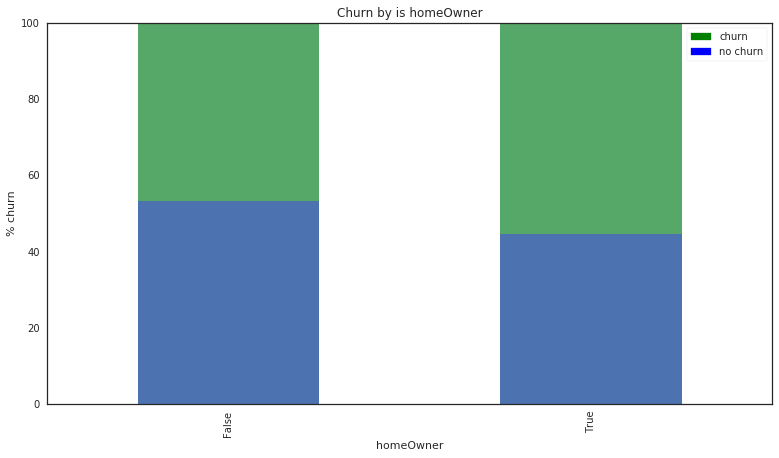

In [60]:
"""
Taken from Lab4
"""

homeOwner = 1 / df_quality[df_quality.homeOwner == True].count()['homeOwner']


nohomeOwner = 1 / df_quality[df_quality.homeOwner == False].count()['homeOwner']


df_quality['percent'] = homeOwner * 100


index_list = df_quality[df_quality['homeOwner'] == False].index.tolist()


for i in index_list:
    df_quality.loc[i, 'percent'] = nohomeOwner * 100


category_group = df_quality[['percent','homeOwner','churn']].groupby(['homeOwner','churn']).sum()


my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Churn by is homeOwner", figsize=(13,7))


red_patch = mpatches.Patch(color='green', label='churn')
blue_patch = mpatches.Patch(color='blue', label='no churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)


my_plot.set_xlabel("homeOwner")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

(0, 100)

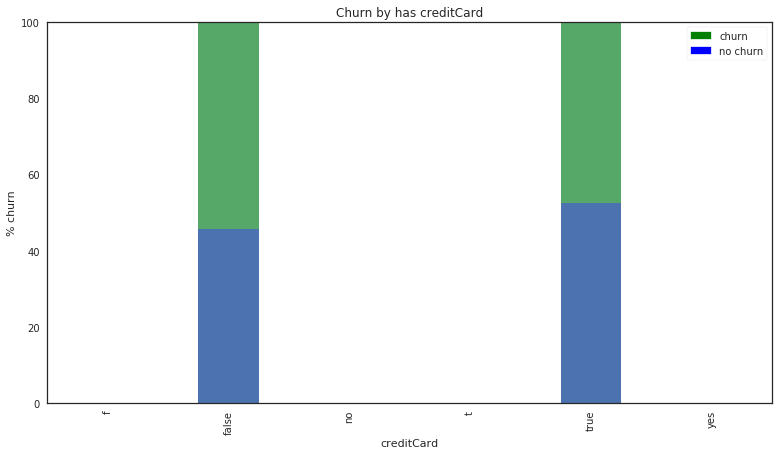

In [61]:
"""
Taken from Lab4
"""

creditCard = 1 / df_quality[df_quality.creditCard == 'true'].count()['creditCard']


nocreditCard = 1 / df_quality[df_quality.creditCard == 'false'].count()['creditCard']


df_quality['percent'] = creditCard * 100


index_list = df_quality[df_quality['creditCard'] == 'false'].index.tolist()


for i in index_list:
    df_quality.loc[i, 'percent'] = nocreditCard * 100


category_group = df_quality[['percent','creditCard','churn']].groupby(['creditCard','churn']).sum()


my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Churn by has creditCard", figsize=(13,7))


red_patch = mpatches.Patch(color='green', label='churn')
blue_patch = mpatches.Patch(color='blue', label='no churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)


my_plot.set_xlabel("creditCard")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

## Plotting continuous features against churn

/home/robbie/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


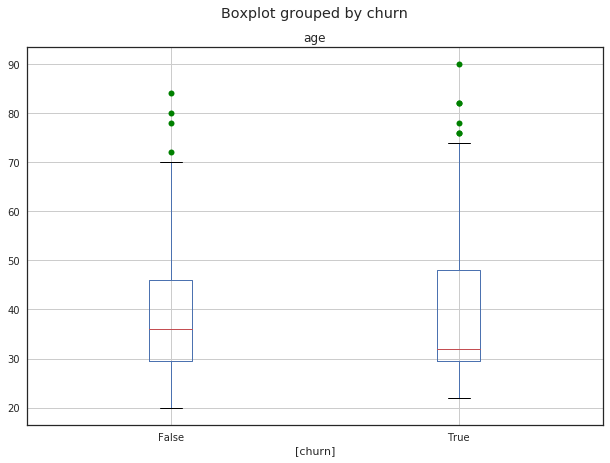

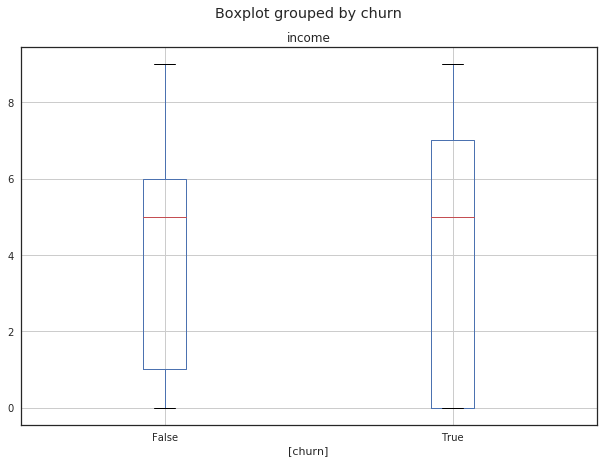

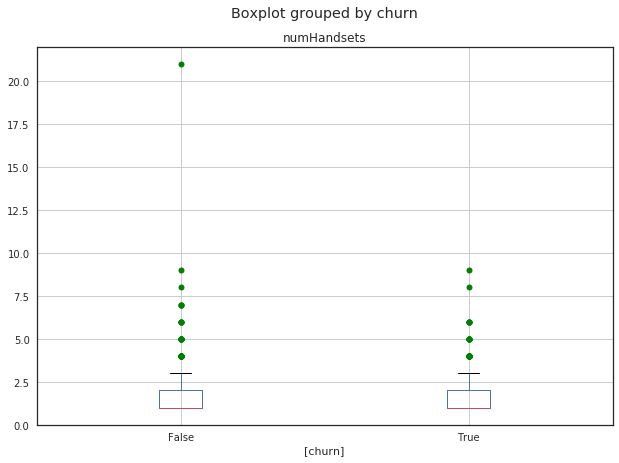

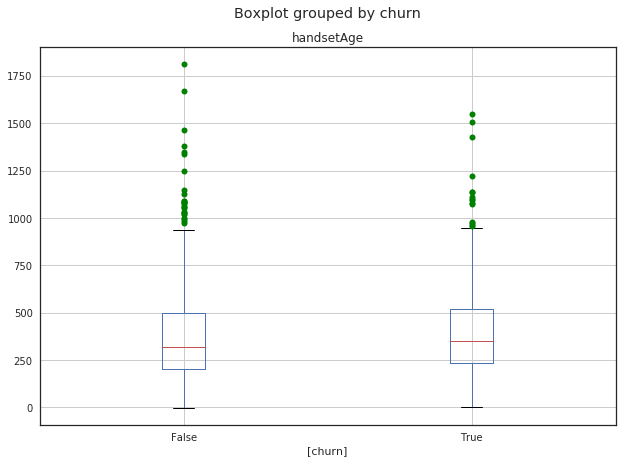

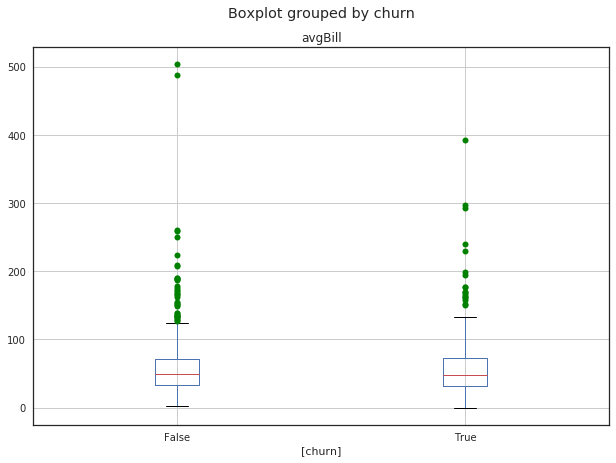

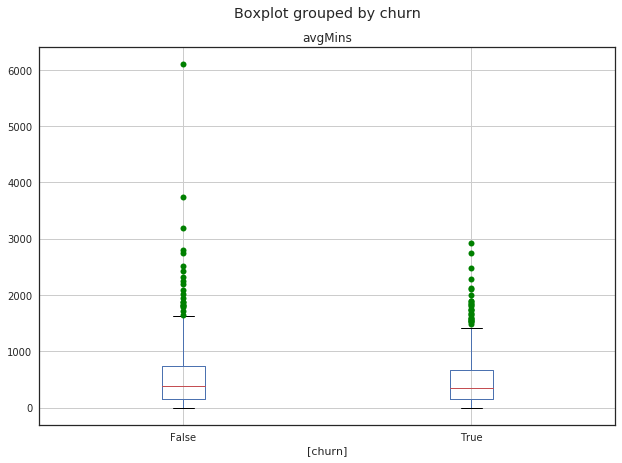

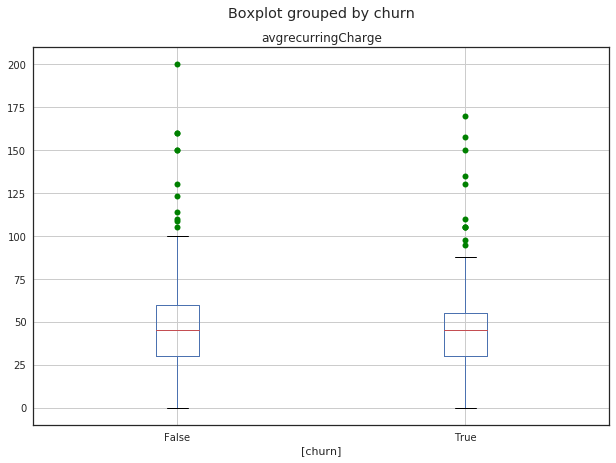

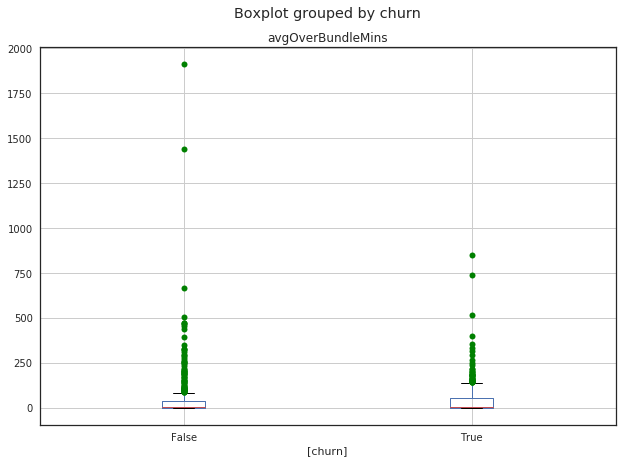

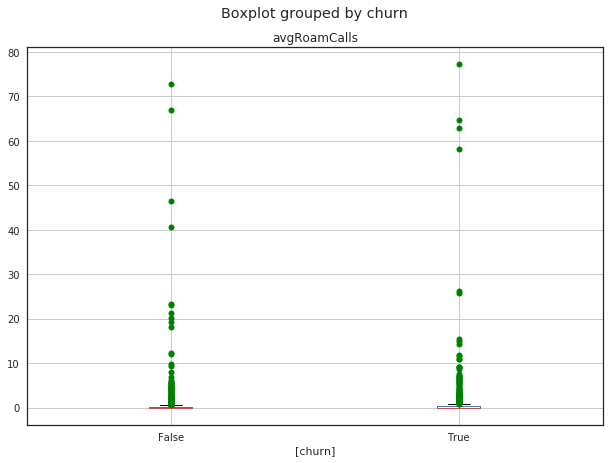

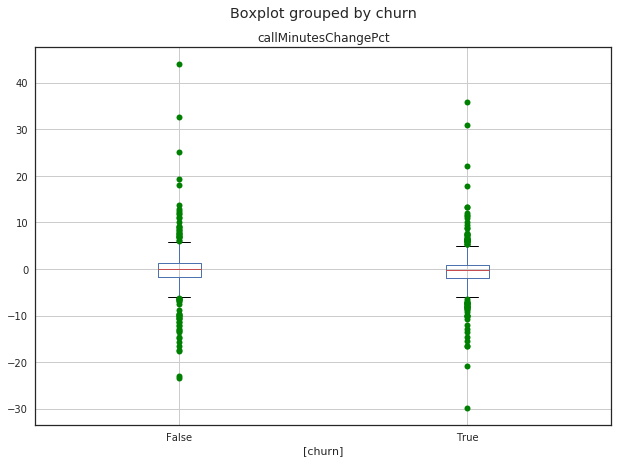

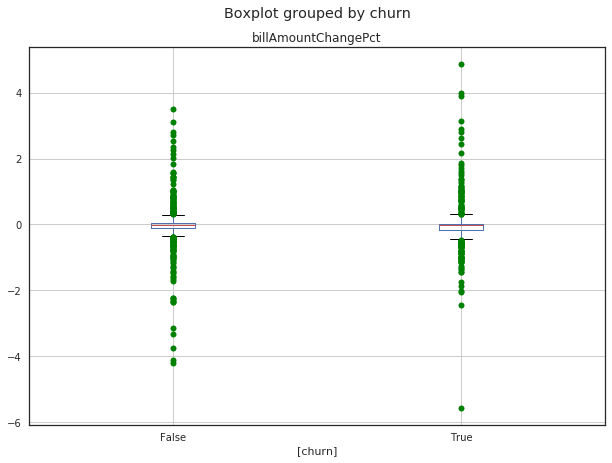

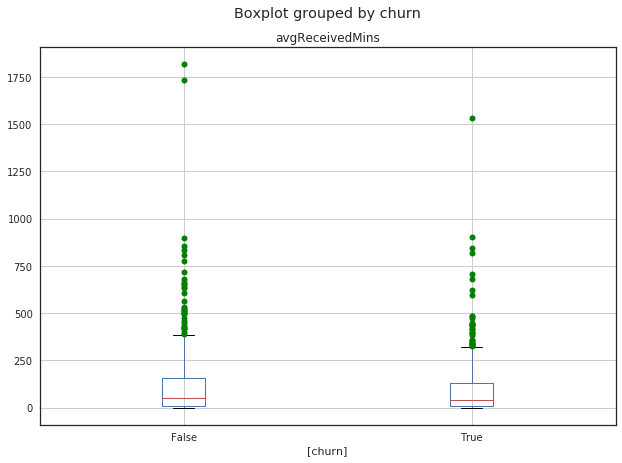

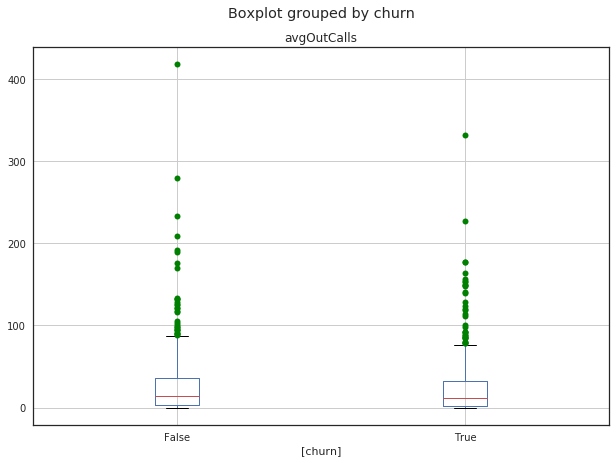

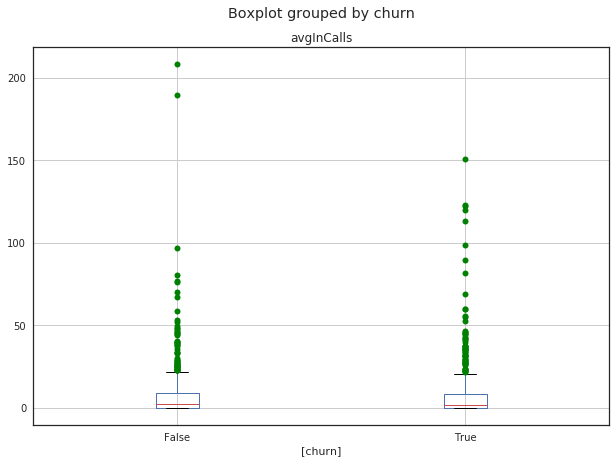

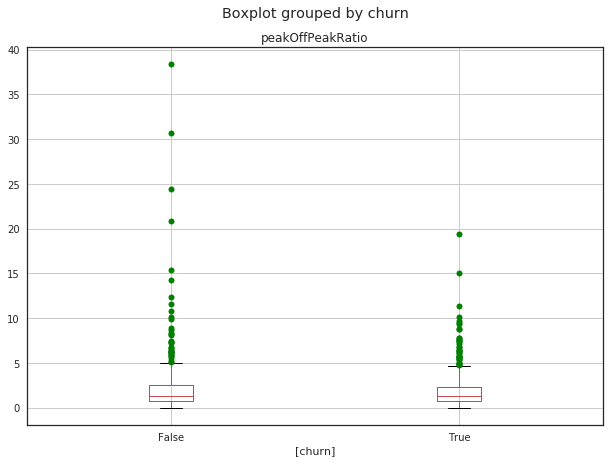

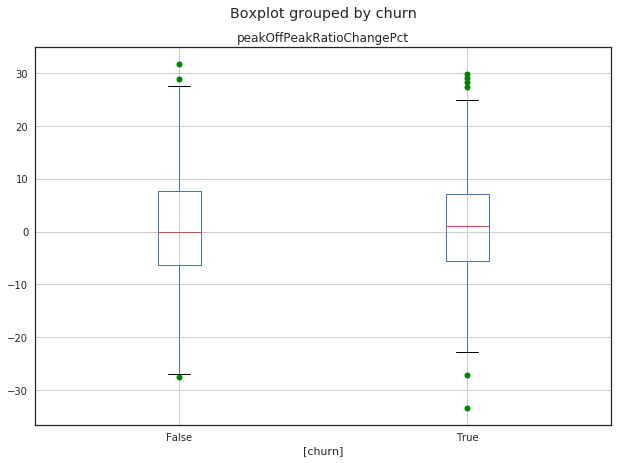

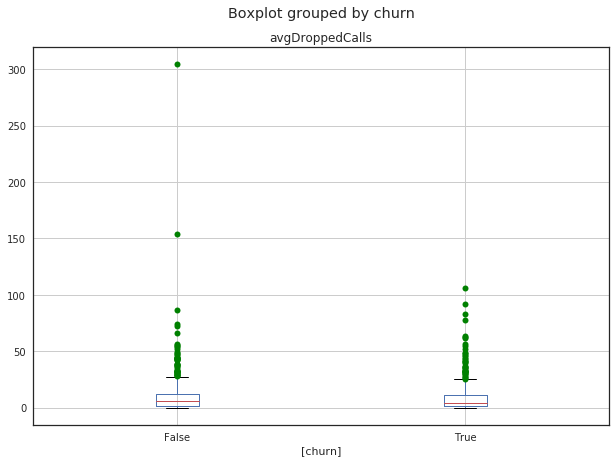

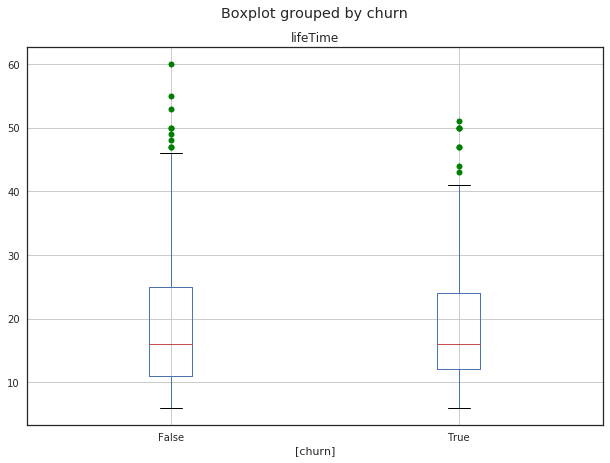

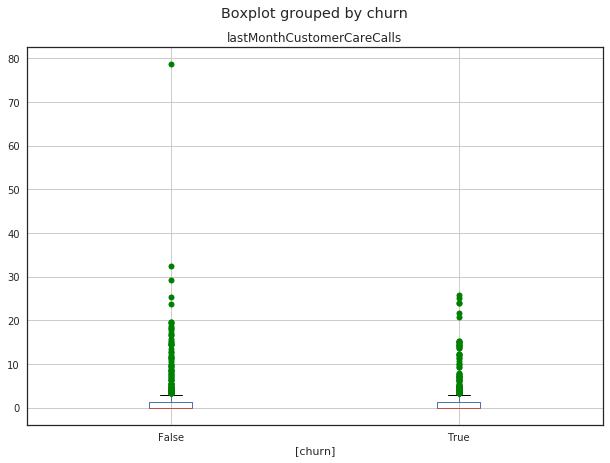

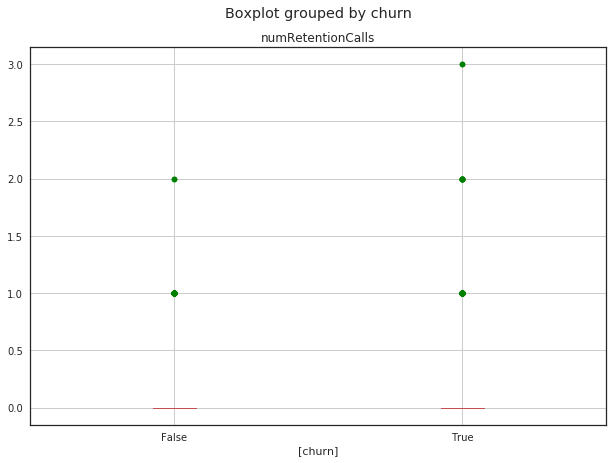

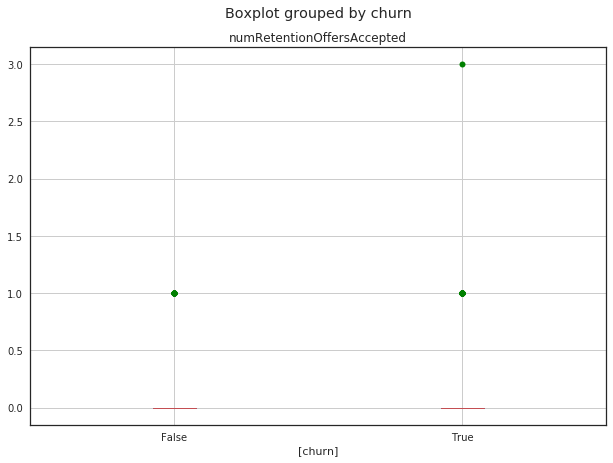

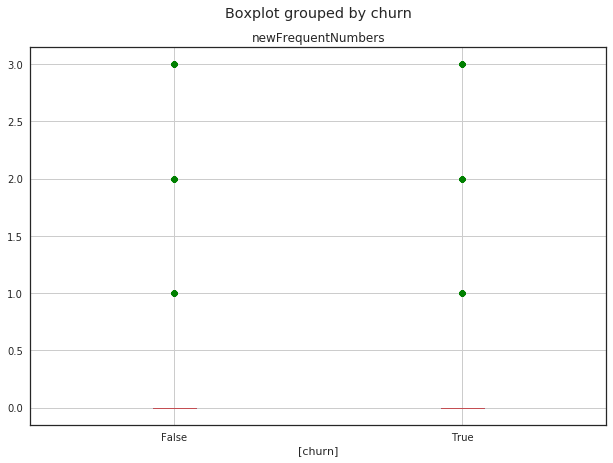

In [62]:
"""
From Lab4
"""
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
for i in continuous_columns:
    bp = df_quality.boxplot(column=[i], by=['churn'], flierprops=flierprops, figsize=(10,7))


# Discussion

By looking at the above plots it is difficult to easily determine if there is  a relationship between these features and churn.

For example, in the categorical features there seems to be a slightly higher rate of churn in customers who don't have a credit card but the difference is less than 10%


For the continuous features there is very little difference in the distributions of features when grouped by churn. age appears to have a slightly lower median age for those who churned but this difference is again not particularly obvious.


The sample that was analysed shows some indications of the recorded features influencing churn but the influence is not very obvious. Further investigation is required to fully understand therelationships between the features.
